# **Machine Learning Final Project**
In Partial Fulfillment Of The Requirements for the Subject Machine Learning

Notebook Prepared by : **Nephea Cagas, Jan Carlo Galinato, Erica Opalla, Hannah Velono, Jan Rey Viudor**

# **Seedling Sucess**
#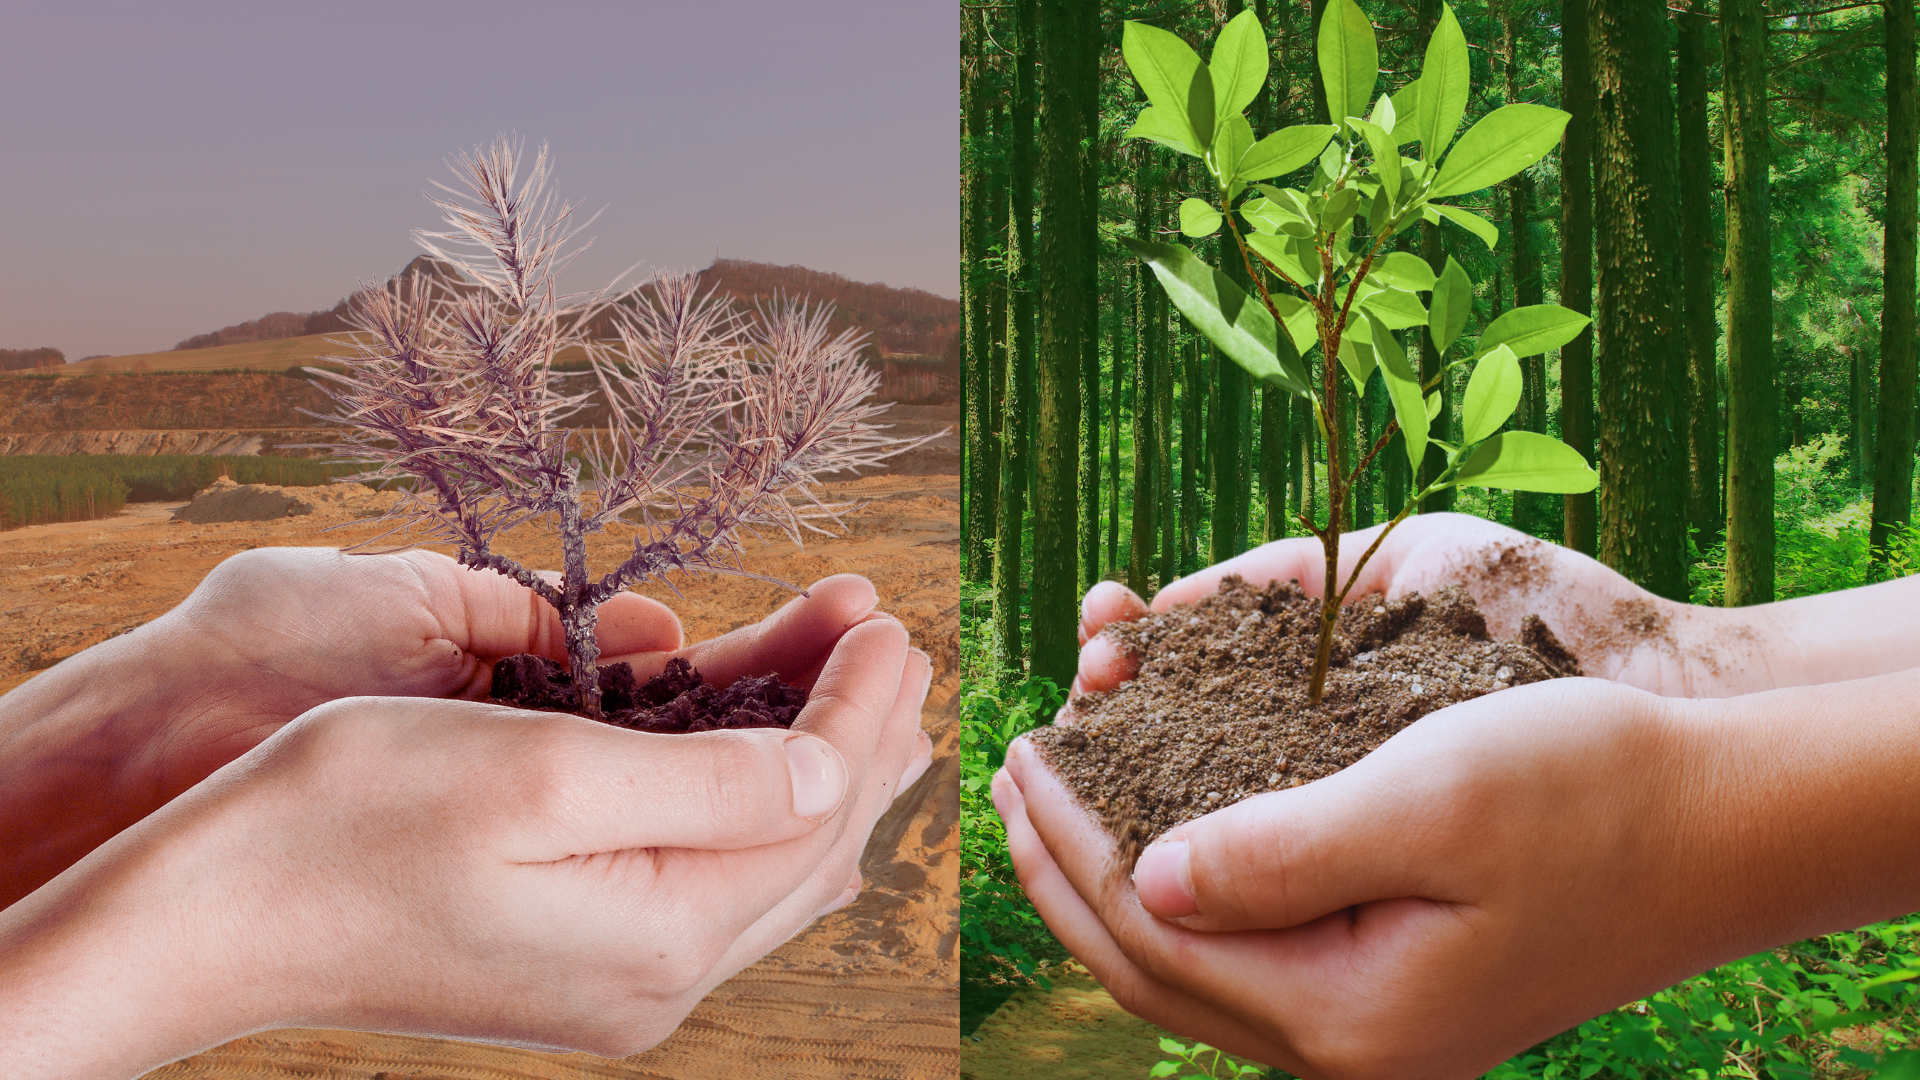**Utilizing Environmental and Biochemical Factors to Predict Tree Seedling Survival**

## **1 Executive Summary**

## **2 Introduction**

**Tree planting** involves moving young tree seedlings to a new location, usually for purposes such as forestry, land reclamation, or landscaping. This process is different from transplanting larger trees, which is done in arboriculture, and from simply spreading tree seeds, which is cheaper but less reliable and slower *(Wikipedia contributors, 2024)*. A **tree seedling** is a very young tree, smaller and more delicate than a sapling. In its early growth stage, it typically has only a few leaves and a thin stem *("Seedling," 2024)*. This fragile stage requires careful handling and nurturing to ensure the seedling can grow into a strong, healthy tree. Properly planting and caring for these seedlings is essential for their survival and for the success of tree planting efforts.

However, if a tree seedling fails to survive due to inadequate care, environmental stressors, or other factors, it can have significant consequences.
When a **tree seedling dies**, it not only represents a loss of resources and effort invested in its planting but also impacts the local ecosystem. Failed tree plantings can result in barren patches of land that are susceptible to erosion, soil degradation, and loss of biodiversity. Moreover, the absence of trees diminishes the ecosystem's capacity to mitigate climate change by reducing carbon dioxide levels, regulating temperatures, and providing habitat for wildlife. In contrast, when a **tree seedling survives** and thrives, it contributes to ecosystem health by sequestering carbon, improving air quality, conserving soil moisture, and supporting biodiversity.


The importance of successfully planting and nurturing tree seedlings extends beyond individual sites to global environmental sustainability. Planting trees has many important benefits for the environment. One key benefit is that trees **help fight climate change by absorbing carbon dioxide from the atmosphere.** This helps reduce the amount of greenhouse gases, which is crucial for controlling global warming. Trees also **provide shade and cool the air**, which can help lower temperatures in urban areas. Additionally, trees produce oxygen, which is essential for all living beings. In the Philippines, tree planting is especially important. The country is naturally green, but many trees are being cut down at an alarming rate. This deforestation leads to serious problems like droughts, floods, and landslides. The Philippines is also located in the Pacific Ring of Fire, where many typhoons occur each year. **Planting trees can help protect the environment and reduce the impact of these natural disasters.** Tree planting involves transplanting young tree seedlings, which are small and fragile trees in the early stages of growth, to areas where they can grow and thrive.
*(Tree Planting Philippines – Eight Benefits of Tree Planting (n.d.-b))*










## **3 Problem Statement, and Objective**

Our investigation will focus on answering three critical questions: Firstly, which factors have the most significant impact on the survival rates of different tree species? Can we predict the likelihood of death for each seedling based on time? And finally, what are the key differences in the traits or characteristics of surviving versus non-surviving tree seedlings?.This project aims to identify the key factors that distinguish the survival and mortality outcomes of tree seedlings in varying environmental conditions

## **4 Methodology**

# 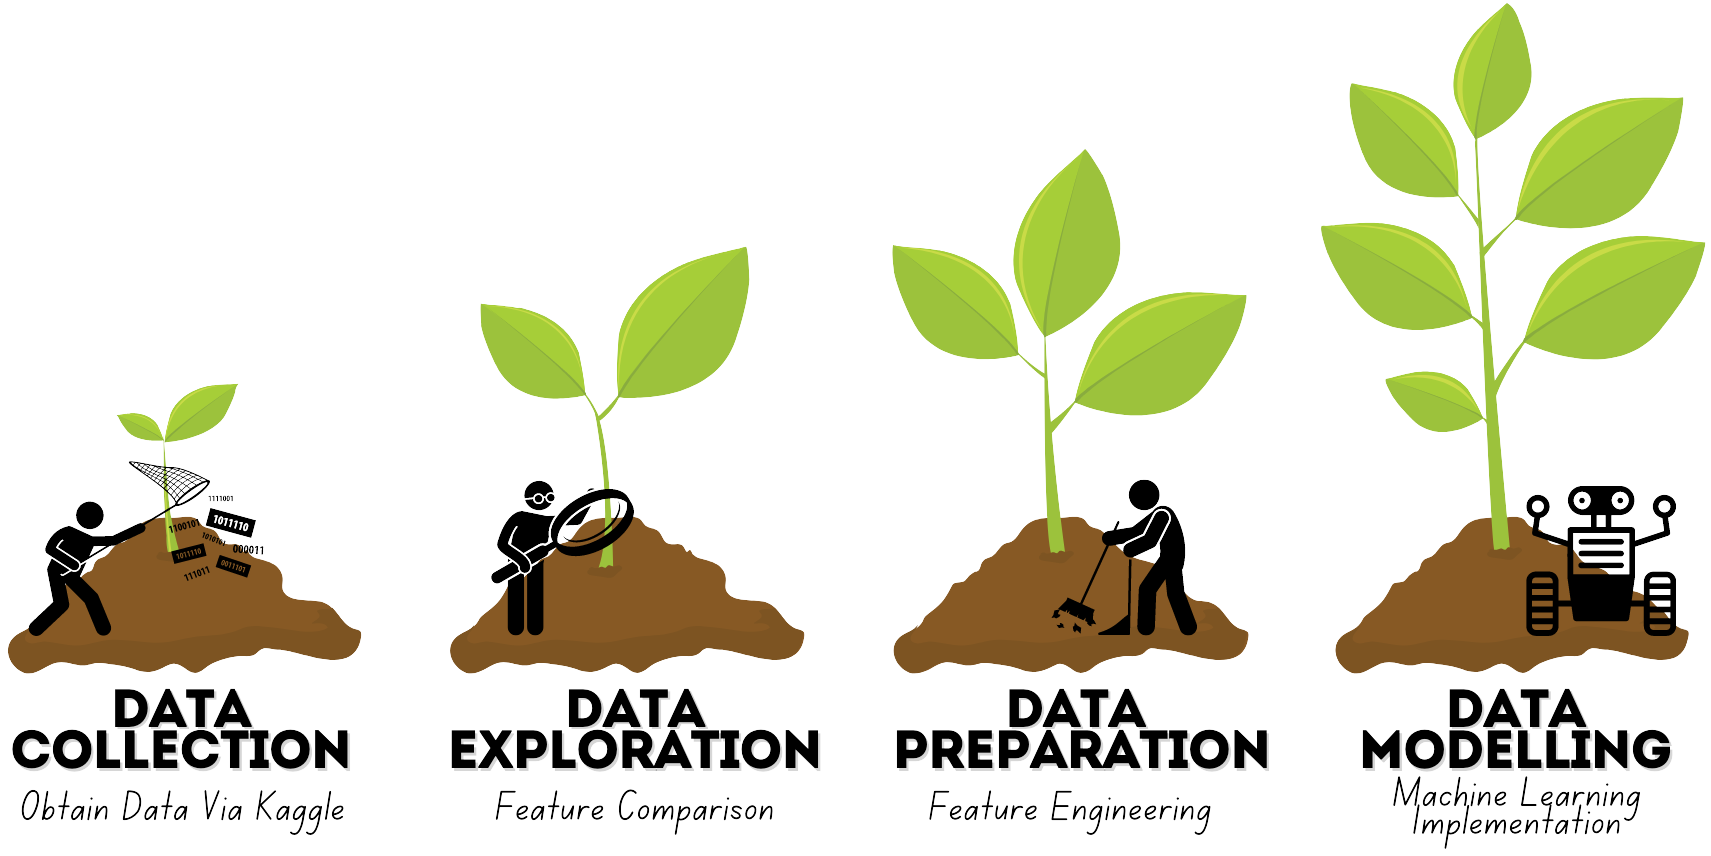

## **4.1 Data Description | Cleaning**

The dataset used in this study was obtained from **Kaggle**, a popular platform for data science and machine learning competitions, as well as a repository for datasets, code, and tutorials related to various fields. The experiment itself was conducted by researchers, Katherine Wood, Richard Kobe, Inés Ibáñez, and Sarah McCarthy-Neumannfrom Michigan State University, University of Michigan-Ann Arbor, and Tennessee State University. Their research facility was based at Michigan State University.

The experiment employed a factorial blocked design field experiment approach, involving four tree species, seven soil sources (including sterilized conspecific, live conspecific, and five heterospecific), and a gradient of forest understory light levels categorized as low, medium, and high. In total, 3,024 seedlings were utilized for the experiment. The researchers monitored seedling survival twice per week over one growing season and selected random subsets of seedlings to measure mycorrhizal colonization and phenolics, lignin, and NSC measurements at three weeks. To analyze the data, Cox proportional hazards survival models were employed to evaluate survival rates, while linear mixed effects models were used to assess how light availability and soil source influenced various traits. Additionally, it provided 24 feature columns.

**Detailed information about each feature follows:**

| Feature | DataType | Definition |
| :- | :-: | :- |
| **No** | int64 |  A unique number assigned to each individual seedling for identification purposes. |
| **Plo**t | int64 | Number representing the specific area of land where the seedling was planted, ranging from 1 to 18. |
| **Subplot** | object |   A smaller division within each plot, divided into 5 sections (one at each corner and one in the middle), labeled as A, B, C, D, and E. |
| **Species** | object  | Tree species, including Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.
| **Light ISF** | float64 | The amount of light reaching each subplot at a height of 1m.
| **Light Cat** | object | Category of light level, categorized as low, medium, or high|
| **Core** | int64 |  Year when a soil core sample was taken from the field.
| **Soil** | object | Type of soil the seedling was planted in, including different tree species and sterilized soil.
| **Adult** | object | Tree from which the soil sample was taken.
| **Sterile** | object | Indicates whether the soil was sterilized or not.
| **Conspecific** | object | Indicates whether the soil was conspecific, heterospecific, or sterilized conspecific.
| **Myco** | object | Mycorrhizal type of the seedling species (AMF or EMF).
| **SoilMyco** | object | Mycorrhizal type of the species culturing the soil (AMF or EMF).|
| **PlantDate** | object |  The date when seedlings were planted in the field pots.|
| **AMF** | float64 | Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.
| **EMF** | float64 | Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
| **Phenolics** | float64 | Calculated as nmol Gallic acid equivalents per mg dry extract
| **NSC** | float64 | Calculated as percent dry mass nonstructural carbohydrates.
| **Lignin** | float64 | Calculated as percent dry mass lignin.
| **Census** | int64 | The specific observation period or event number at which the seedling died or was harvested.|
| **Time** | float64 | The specific observation period or event number at which the seedling died or was harvested.|
| **Event** | float64 | Used for survival analysis to indicate the status of each individual seedling at a given time. 0 = harvested or experiment ended, 1 = dead.
| **Harvest** | object | Indicates whether the seedling was harvested for trait measurement.
| **Alivet** | object | Indicates if the seedling was alive at the end of the second growing season, with "X" indicating alive status.

### **Import Libraries | Load Dataset**

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
import shap
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
url = 'https://raw.githubusercontent.com/NephCgs/jnotebook/main/Tree_Data.csv'
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [ ]:
# drop columns not relevant in the project scope
df = df.drop(columns=['No','Plot', 'Subplot', 'PlantDate', 'Census', 'Harvest', 'Alive', 'Core'], axis=1)
df.head()

Species  Light_ISF Light_Cat             Soil Adult      Sterile  \
0  Acer saccharum      0.106       Med  Prunus serotina     I  Non-Sterile   
1    Quercus alba      0.106       Med    Quercus rubra   970  Non-Sterile   
2   Quercus rubra      0.106       Med  Prunus serotina     J  Non-Sterile   
3  Acer saccharum      0.080       Med  Prunus serotina     J  Non-Sterile   
4  Acer saccharum      0.060       Low  Prunus serotina   689  Non-Sterile   

      Conspecific Myco SoilMyco    AMF    EMF  Phenolics  Lignin    NSC  \
0  Heterospecific  AMF      AMF  22.00    NaN      -0.56   13.86  12.15   
1  Heterospecific  EMF      EMF  15.82  31.07       5.19   20.52  19.29   
2  Heterospecific  EMF      AMF  24.45  28.19       3.36   24.74  15.01   
3  Heterospecific  AMF      AMF  22.23    NaN      -0.71   14.29  12.36   
4  Heterospecific  AMF      AMF  21.15    NaN      -0.58   10.85  11.20   

    Time  Event  
0   14.0    1.0  
1  115.5    0.0  
2   63.0    1.0  
3   14.0    1.0  
4   14.0    1.0

In [ ]:
df.isnull().sum()

Species           0
Light_ISF         0
Light_Cat         0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Time              0
Event             1
dtype: int64

In [ ]:
df.Adult.unique()

array(['I', '970', 'J', '689', '1332', '891', '1595', '1323', '394',
       '561', '1478', '1320', '1454', '921', '984', '118', '1757', '1384',
       '1688', '961', '1715', '50', '1468', '1201', '1386', '277', '415',
       '285', '275', '1205', '1330', '1297', '1326', 'H', '1027', 'G'],
      dtype=object)

In [ ]:
df = df.drop('EMF', axis=1)
df = df.drop('Adult', axis=1)
df = df.dropna(subset=['Event'])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Species', 'Light_Cat', 'Soil', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco'])

df_encoded.head()

Light_ISF    AMF  Phenolics  Lignin    NSC   Time  Event  \
0      0.106  22.00      -0.56   13.86  12.15   14.0    1.0   
1      0.106  15.82       5.19   20.52  19.29  115.5    0.0   
2      0.106  24.45       3.36   24.74  15.01   63.0    1.0   
3      0.080  22.23      -0.71   14.29  12.36   14.0    1.0   
4      0.060  21.15      -0.58   10.85  11.20   14.0    1.0   

   Species_Acer saccharum  Species_Prunus serotina  Species_Quercus alba  ...  \
0                    True                    False                 False  ...   
1                   False                    False                  True  ...   
2                   False                    False                 False  ...   
3                    True                    False                 False  ...   
4                    True                    False                 False  ...   

   Sterile_Non-Sterile  Sterile_Sterile  Conspecific_Conspecific  \
0                 True            False                    False   
1                 True            False                    False   
2                 True            False                    False   
3                 True            False                    False   
4                 True            False                    False   

   Conspecific_Heterospecific  Conspecific_Sterilized  Myco_AMF  Myco_EMF  \
0                        True                   False      True     False   
1                        True                   False     False      True   
2                        True                   False     False      True   
3                        True                   False      True     False   
4                        True                   False      True     False   

   SoilMyco_AMF  SoilMyco_EMF  SoilMyco_Sterile  
0          True         False             False  
1         False          True             False  
2          True         False             False  
3          True         False             False  
4          True         False             False  

[5 rows x 31 columns]

In [ ]:
scaler = MinMaxScaler()

numerical_cols = ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time']

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

Light_ISF     AMF  Phenolics    Lignin       NSC      Time  Event  \
0   0.573643  0.2200   0.106040  0.380812  0.312127  0.000000    1.0   
1   0.573643  0.1582   0.877852  0.598887  0.596024  1.000000    0.0   
2   0.573643  0.2445   0.632215  0.737066  0.425845  0.482759    1.0   
3   0.372093  0.2223   0.085906  0.394892  0.320477  0.000000    1.0   
4   0.217054  0.2115   0.103356  0.282253  0.274354  0.000000    1.0   

   Species_Acer saccharum  Species_Prunus serotina  Species_Quercus alba  ...  \
0                    True                    False                 False  ...   
1                   False                    False                  True  ...   
2                   False                    False                 False  ...   
3                    True                    False                 False  ...   
4                    True                    False                 False  ...   

   Sterile_Non-Sterile  Sterile_Sterile  Conspecific_Conspecific  \
0                 True            False                    False   
1                 True            False                    False   
2                 True            False                    False   
3                 True            False                    False   
4                 True            False                    False   

   Conspecific_Heterospecific  Conspecific_Sterilized  Myco_AMF  Myco_EMF  \
0                        True                   False      True     False   
1                        True                   False     False      True   
2                        True                   False     False      True   
3                        True                   False      True     False   
4                        True                   False      True     False   

   SoilMyco_AMF  SoilMyco_EMF  SoilMyco_Sterile  
0          True         False             False  
1         False          True             False  
2          True         False             False  
3          True         False             False  
4          True         False             False  

[5 rows x 31 columns]

## **4.2 Data Exploration (Exploratory Data Analysis)**

In [ ]:
df.describe()

Light_ISF          AMF    Phenolics       Lignin          NSC  \
count  2782.000000  2782.000000  2782.000000  2782.000000  2782.000000   
mean      0.085680    20.554349     1.932261    15.758490    14.217074   
std       0.025603    12.311615     1.969693     6.780478     4.296910   
min       0.032000     0.000000    -1.350000     2.230000     4.300000   
25%       0.066000    13.400000     0.170000    10.352500    11.602500   
50%       0.082000    18.000000     0.750000    14.040000    12.655000   
75%       0.100000    24.447500     3.780000    21.117500    17.270000   
max       0.161000   100.000000     6.100000    32.770000    29.450000   

              Time        Event  
count  2782.000000  2782.000000  
mean     53.464953     0.570453  
std      32.067148     0.495100  
min      14.000000     0.000000  
25%      24.500000     0.000000  
50%      45.500000     1.000000  
75%      63.000000     1.000000  
max     115.500000     1.000000

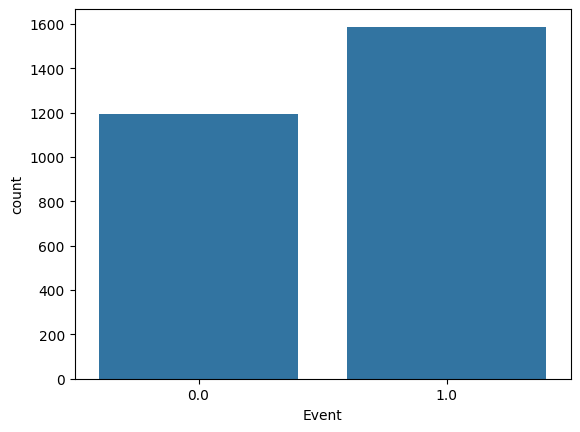

In [ ]:
sns.countplot(x='Event', data=df)
plt.show()

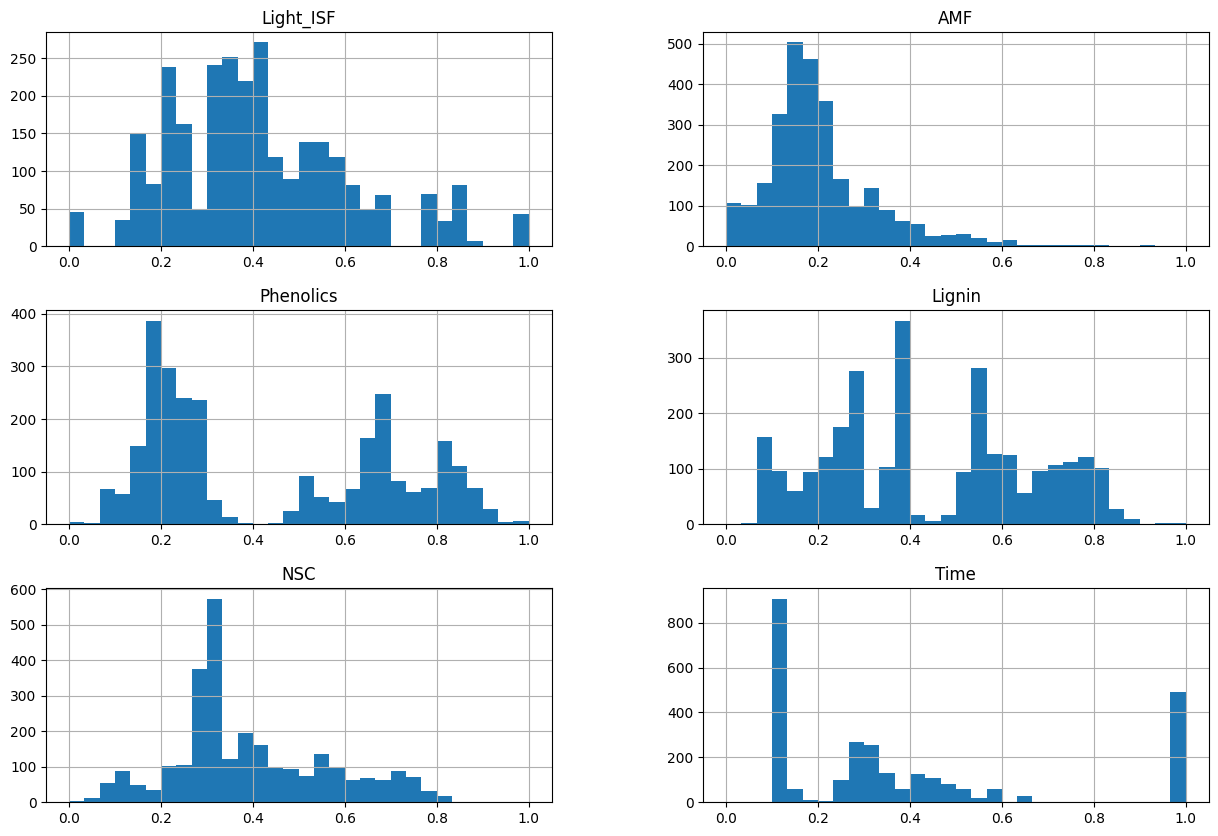

In [ ]:
df_encoded[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.show()

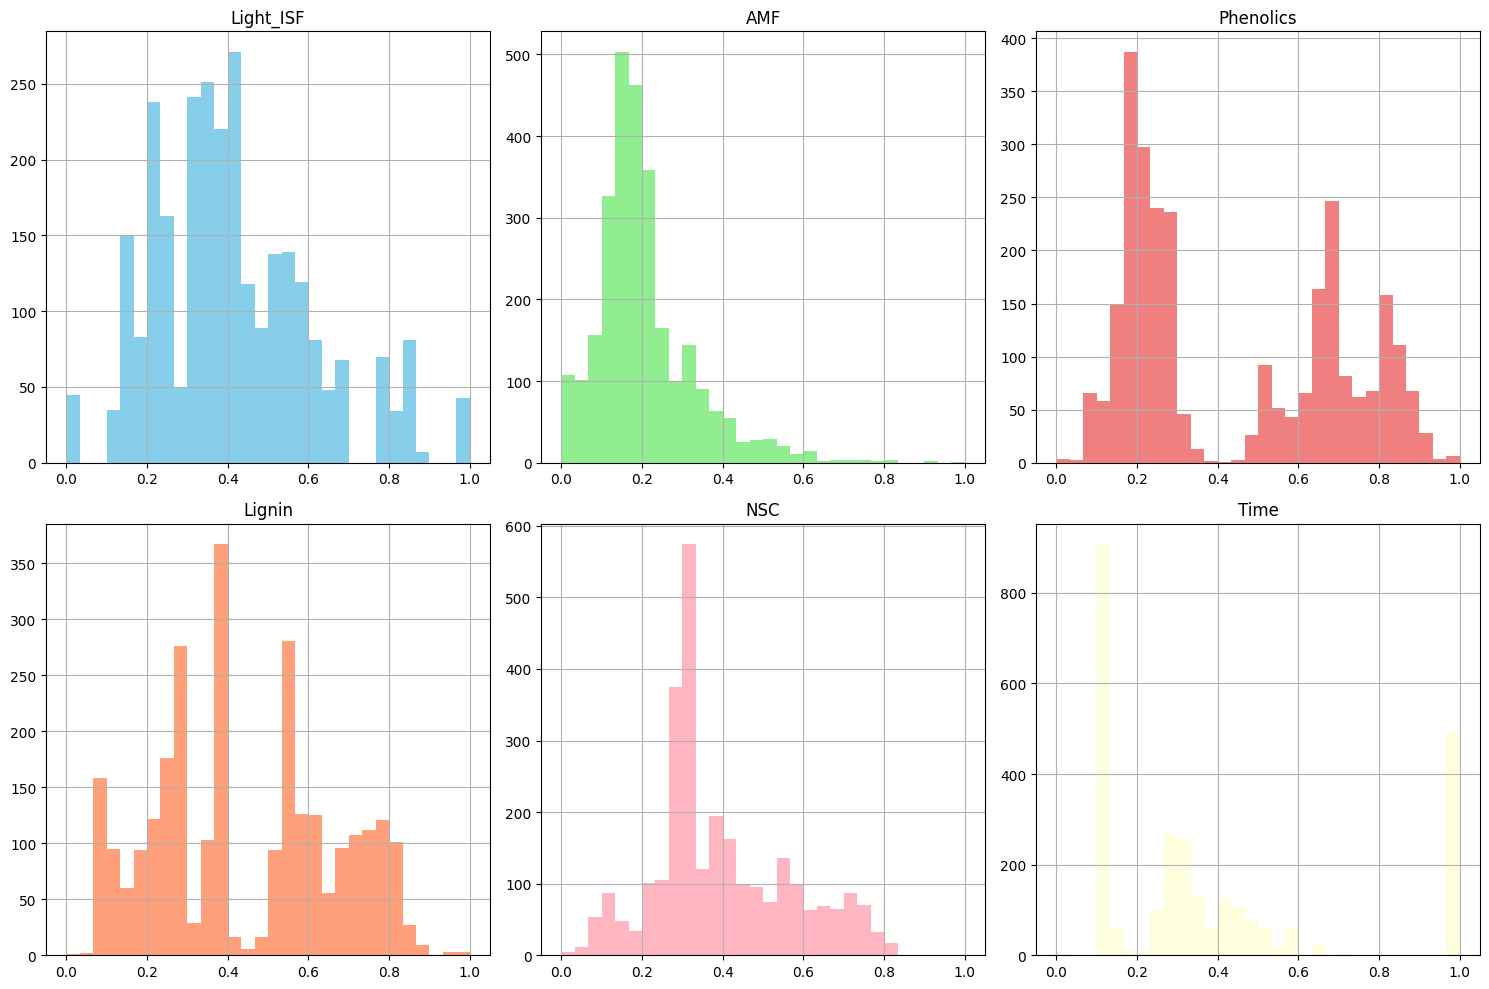

In [ ]:
numerical_cols = ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time']

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    df_encoded[col].hist(bins=30, color=colors[i])
    plt.title(col)
plt.tight_layout()
plt.show()

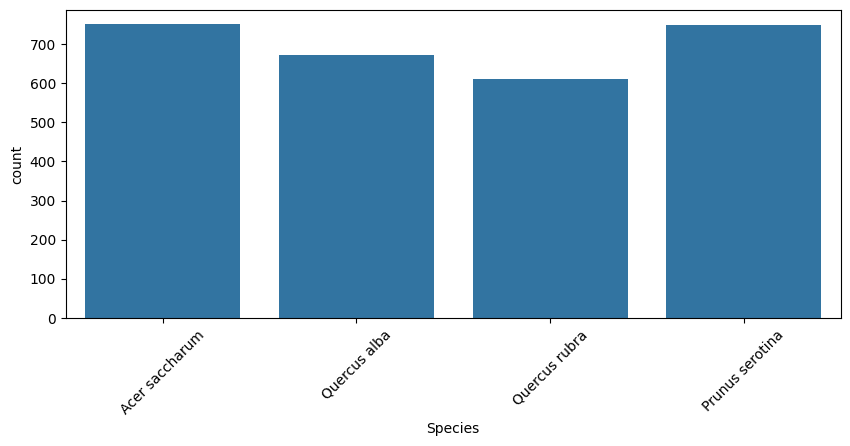

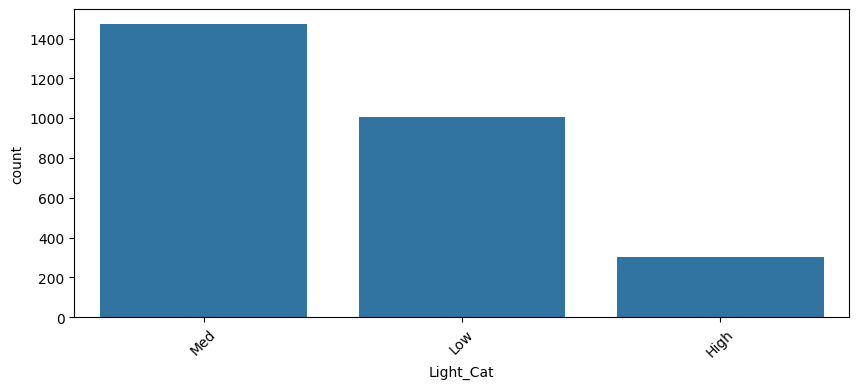

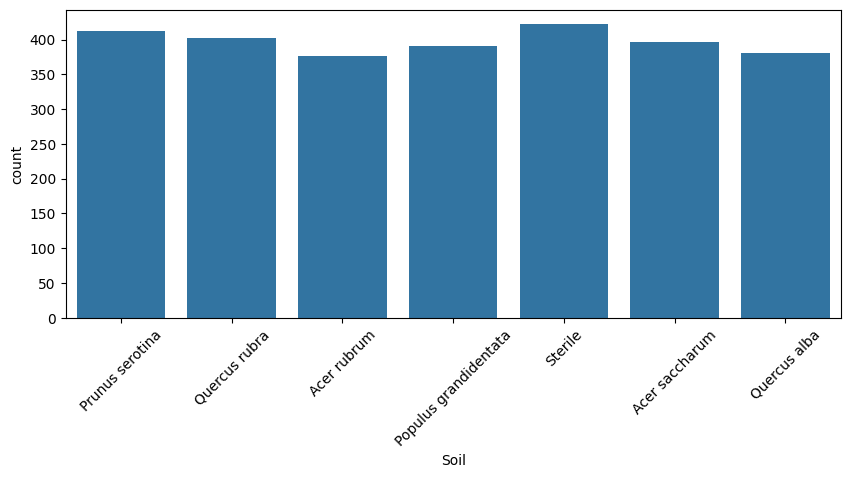

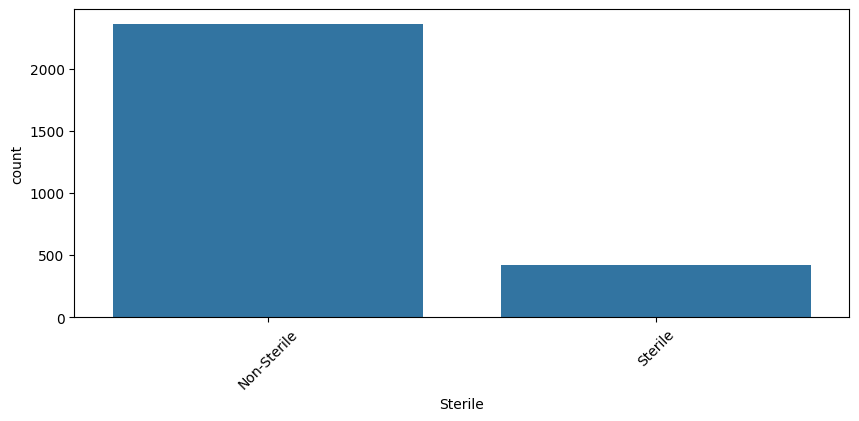

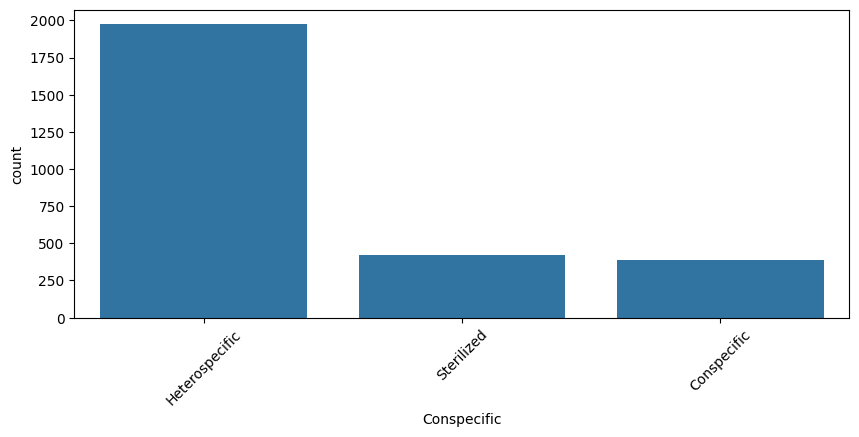

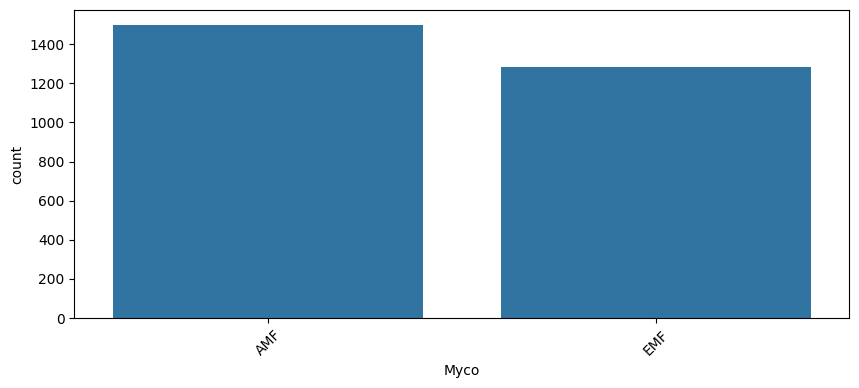

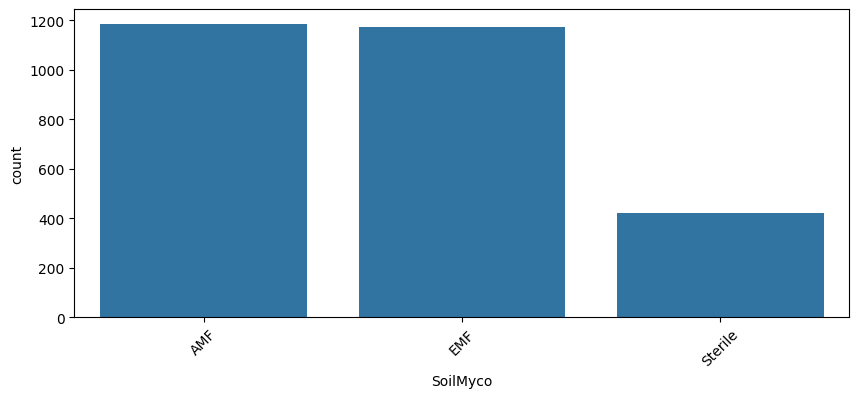

In [ ]:
categorical_cols = ['Species', 'Light_Cat', 'Soil', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

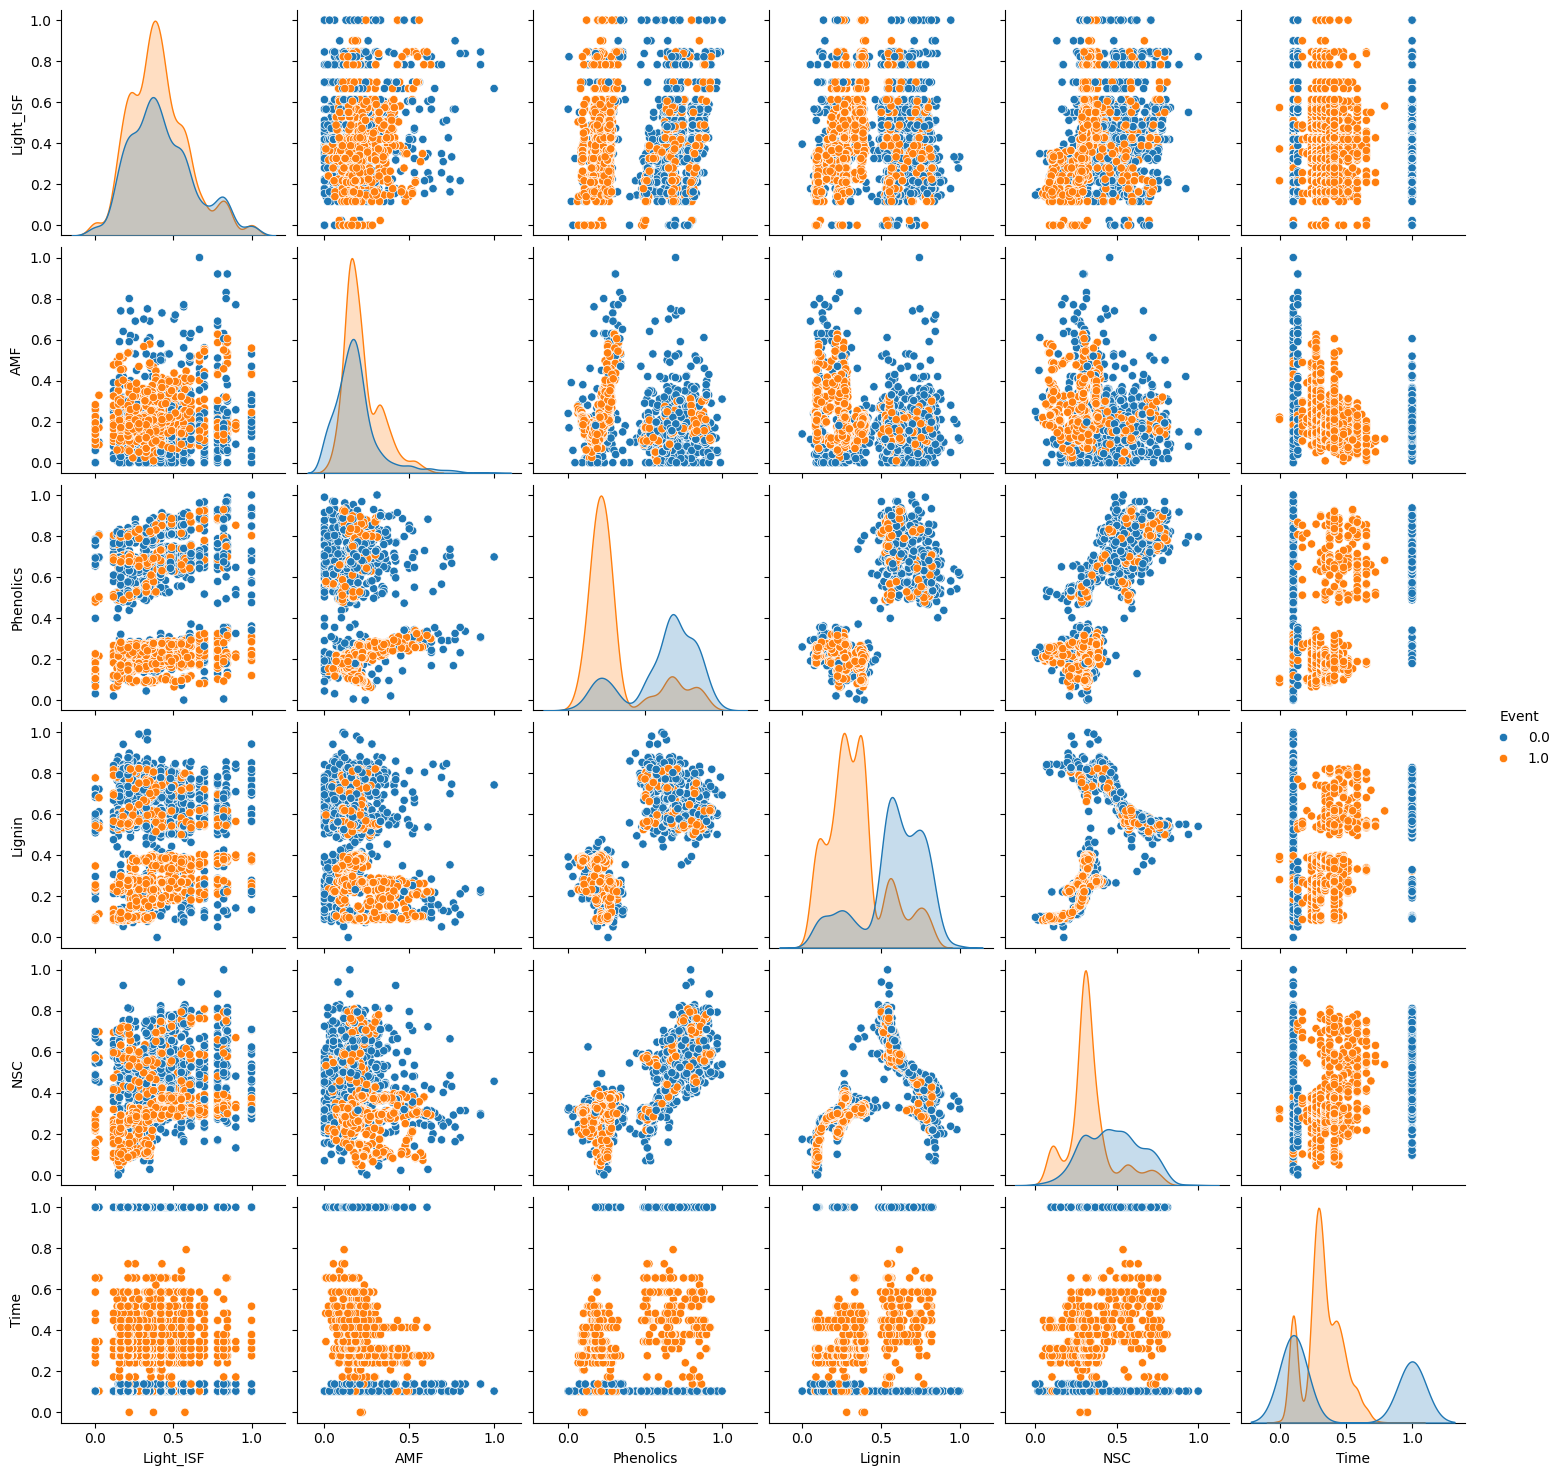

In [ ]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df_encoded, hue='Event', vars=numerical_cols)
plt.show()

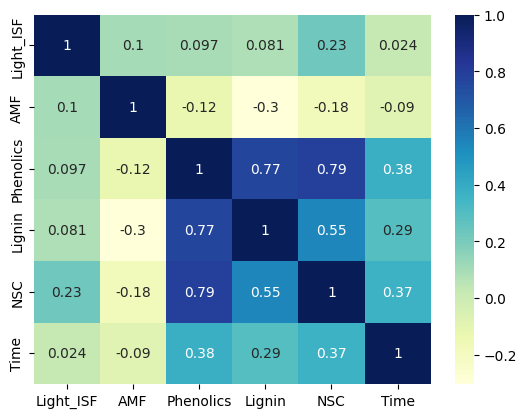

In [ ]:
corr_matrix = df_encoded[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

## **4.3 Data Preparation**

In [ ]:
df.columns

Index(['Species', 'Light_ISF', 'Light_Cat', 'Soil', 'Sterile', 'Conspecific',
       'Myco', 'SoilMyco', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time',
       'Event'],
      dtype='object')

One Hot Encoding

In [ ]:
#Separating the independent and dependent features
y = df['Event']
X = df.drop('Event', axis=1)

In [ ]:
#categrical_columns
df_encoded = pd.get_dummies(X, drop_first=True)
for col in df_encoded:
  df_encoded[col] = df_encoded[col].astype(int)
df_encoded

Light_ISF  AMF  Phenolics  Lignin  NSC  Time  Species_Prunus serotina  \
0             0   22          0      13   12    14                        0   
1             0   15          5      20   19   115                        0   
2             0   24          3      24   15    63                        0   
3             0   22          0      14   12    14                        0   
4             0   21          0      10   11    14                        0   
...         ...  ...        ...     ...  ...   ...                      ...   
2777          0   10          5      21   18    56                        0   
2778          0   40          0       9   11    56                        1   
2779          0   15          4      19   23    56                        0   
2780          0   11          5      21   19    56                        0   
2782          0   60          1       9   11    56                        1   

      Species_Quercus alba  Species_Quercus rubra  Light_Cat_Low  ...  \
0                        0                      0              0  ...   
1                        1                      0              0  ...   
2                        0                      1              0  ...   
3                        0                      0              0  ...   
4                        0                      0              1  ...   
...                    ...                    ...            ...  ...   
2777                     1                      0              0  ...   
2778                     0                      0              0  ...   
2779                     1                      0              0  ...   
2780                     1                      0              0  ...   
2782                     0                      0              0  ...   

      Soil_Prunus serotina  Soil_Quercus alba  Soil_Quercus rubra  \
0                        1                  0                   0   
1                        0                  0                   1   
2                        1                  0                   0   
3                        1                  0                   0   
4                        1                  0                   0   
...                    ...                ...                 ...   
2777                     0                  0                   1   
2778                     0                  0                   0   
2779                     0                  0                   0   
2780                     0                  0                   1   
2782                     0                  0                   0   

      Soil_Sterile  Sterile_Sterile  Conspecific_Heterospecific  \
0                0                0                           1   
1                0                0                           1   
2                0                0                           1   
3                0                0                           1   
4                0                0                           1   
...            ...              ...                         ...   
2777             0                0                           1   
2778             0                0                           1   
2779             0                0                           1   
2780             0                0                           1   
2782             0                0                           1   

      Conspecific_Sterilized  Myco_EMF  SoilMyco_EMF  SoilMyco_Sterile  
0                          0         0             0                 0  
1                          0         1             1                 0  
2                          0         1             0                 0  
3                          0         0             0                 0  
4                          0         0             0                 0  
...                      ...       ...           ...               ...  
2777                       0       

In [ ]:
df_encoded_target = y

Checking for Multicolinearity using Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i)
                          for i in range(len(df_encoded.columns))]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature        VIF
0                    Light_ISF        NaN
1                          AMF   7.033194
2                    Phenolics  32.903149
3                       Lignin  32.070899
4                          NSC  28.926601
5                         Time   4.481876
6      Species_Prunus serotina   3.424356
7         Species_Quercus alba        inf
8        Species_Quercus rubra        inf
9                Light_Cat_Low   4.005342
10               Light_Cat_Med   5.705594
11         Soil_Acer saccharum   2.267914
12  Soil_Populus grandidentata        inf
13        Soil_Prunus serotina   2.180606
14           Soil_Quercus alba        inf
15          Soil_Quercus rubra        inf
16                Soil_Sterile        inf
17             Sterile_Sterile        inf
18  Conspecific_Heterospecific   6.726824
19      Conspecific_Sterilized        inf
20                    Myco_EMF        inf
21                SoilMyco_EMF        inf
22            SoilMyco_Sterile    

In [ ]:
continuous_col = X[X.describe().columns]
vif_data2 = pd.DataFrame()
vif_data2["feature"] = continuous_col.columns

# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(continuous_col.values, i)
                          for i in range(len(continuous_col.columns))]

print(vif_data2)

     feature        VIF
0  Light_ISF  12.940345
1        AMF   3.460946
2  Phenolics   5.503882
3     Lignin  11.991949
4        NSC  21.559419
5       Time   4.396416


## **4.4 Machine Learning Implementation**

### **Proportion Change Criteria**

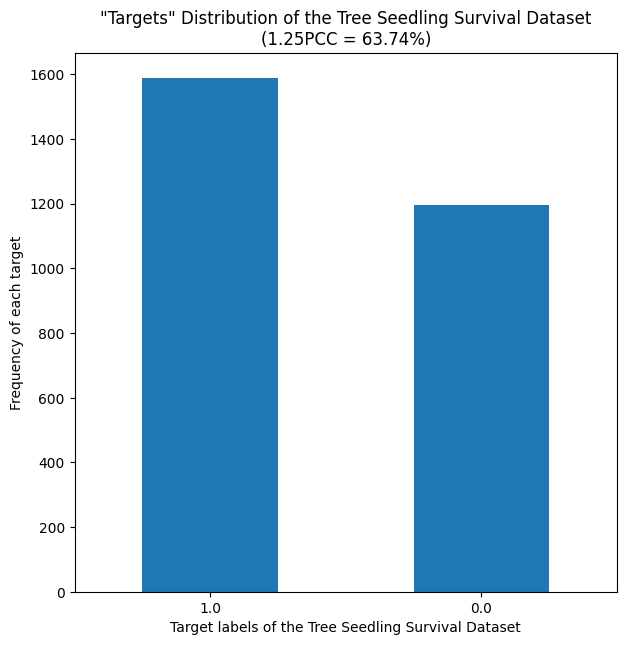

In [ ]:
df_encoded_pcc = df.copy()
y = df_encoded_pcc['Event']
X = df_encoded_pcc.drop('Event', axis=1)
df_encoded_pcc = pd.get_dummies(X, drop_first=True)
for col in df_encoded_pcc:
    df_encoded_pcc[col] = df_encoded_pcc[col].astype(int)
df_encoded_pcc['Event'] = y

# PCC calculator function
def PCC_calculator(df, target_name=[], dataset_name='given', graph=True):
    target_count = Counter(df['Event'])

    df_target_count = pd.DataFrame.from_dict(target_count, orient='index', columns=['n_i'])

    PCC = ((df_target_count.n_i / df_target_count.n_i.sum()) ** 2).sum() * 1.25 * 100

    if not any(target_name):
        target_name = df_target_count.index.to_list()

    if graph:
        ax = df_target_count.plot(kind='bar', rot=0, figsize=(7, 7))
        ax.get_legend().remove()
        ax.set_ylabel('Frequency of each target')
        ax.set_xlabel(f'Target labels of the {dataset_name} Dataset')
        ax.set_title(f'"Targets" Distribution of the {dataset_name} Dataset\n'
                     f'(1.25PCC = {PCC:.2f}%)')
        ax.set_xticklabels(target_name)

    return PCC


pcc_value = PCC_calculator(df_encoded_pcc, dataset_name='Tree Seedling Survival', graph=True)


plt.show()

### **kNN**

Text(0, 0.5, 'Target')

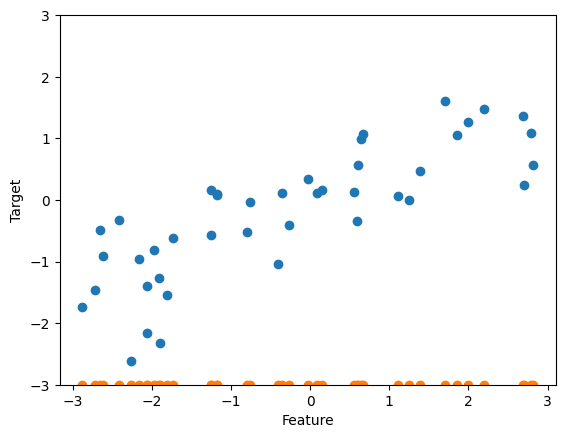

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=42)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

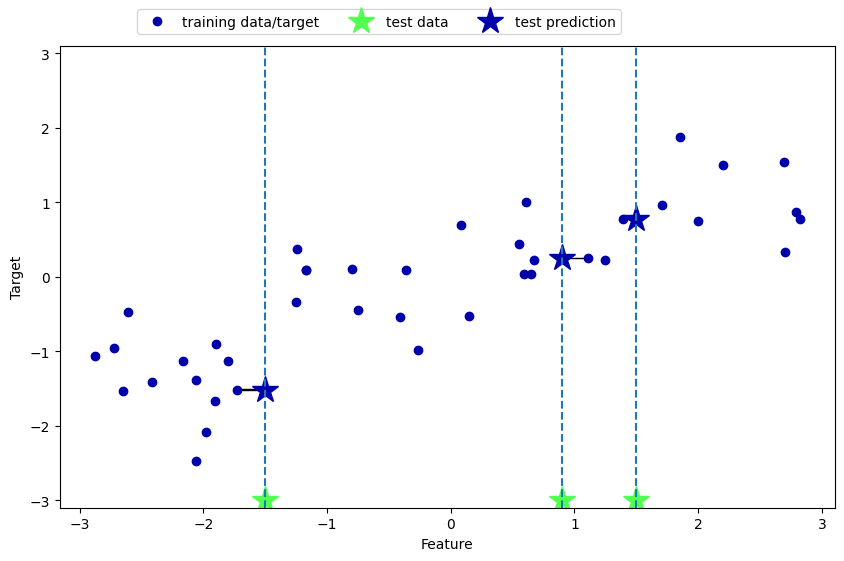

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

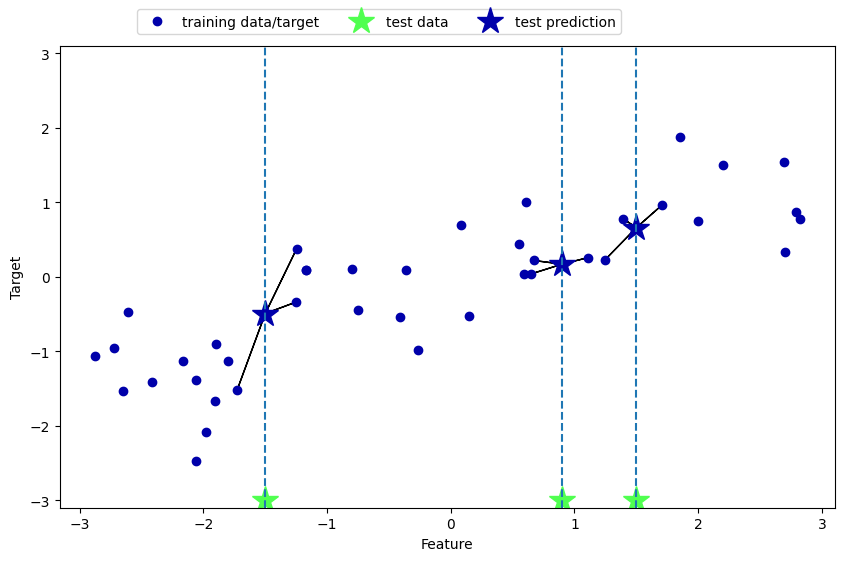

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

In [ ]:
y

array([-0.03019966,  0.2496594 ,  0.47248008, -0.3344344 , -2.15626114,
       -1.39369665, -0.49398173,  1.48142509,  0.57326631, -0.00667445,
       -1.7412324 ,  0.56959354,  1.26312967, -0.62521417, -1.27090562,
       -2.31505107,  0.07471828,  0.16163227, -1.04164897,  0.15747198,
        1.07174269, -0.96488905, -0.56211724, -0.52268276, -0.40094074,
        1.60933303, -1.53976898,  0.11738386,  0.12297789, -1.46179515,
        0.99470921, -0.80959384, -0.91637831,  1.36072895,  1.08575601,
        1.05232257,  0.09440549, -0.3234454 ,  0.05577813,  0.10729212,
       -2.61694135,  0.33873407])

In [ ]:
reg.predict(X_test)

array([ 0.4368582 , -0.10997566,  0.03314187, -1.20983044, -1.3424338 ,
        0.92931077,  0.4368582 ,  0.89871479, -1.3424338 , -1.65988445,
       -1.3424338 ])

In [ ]:
reg.score(X_test, y_test)

0.7184860975559395

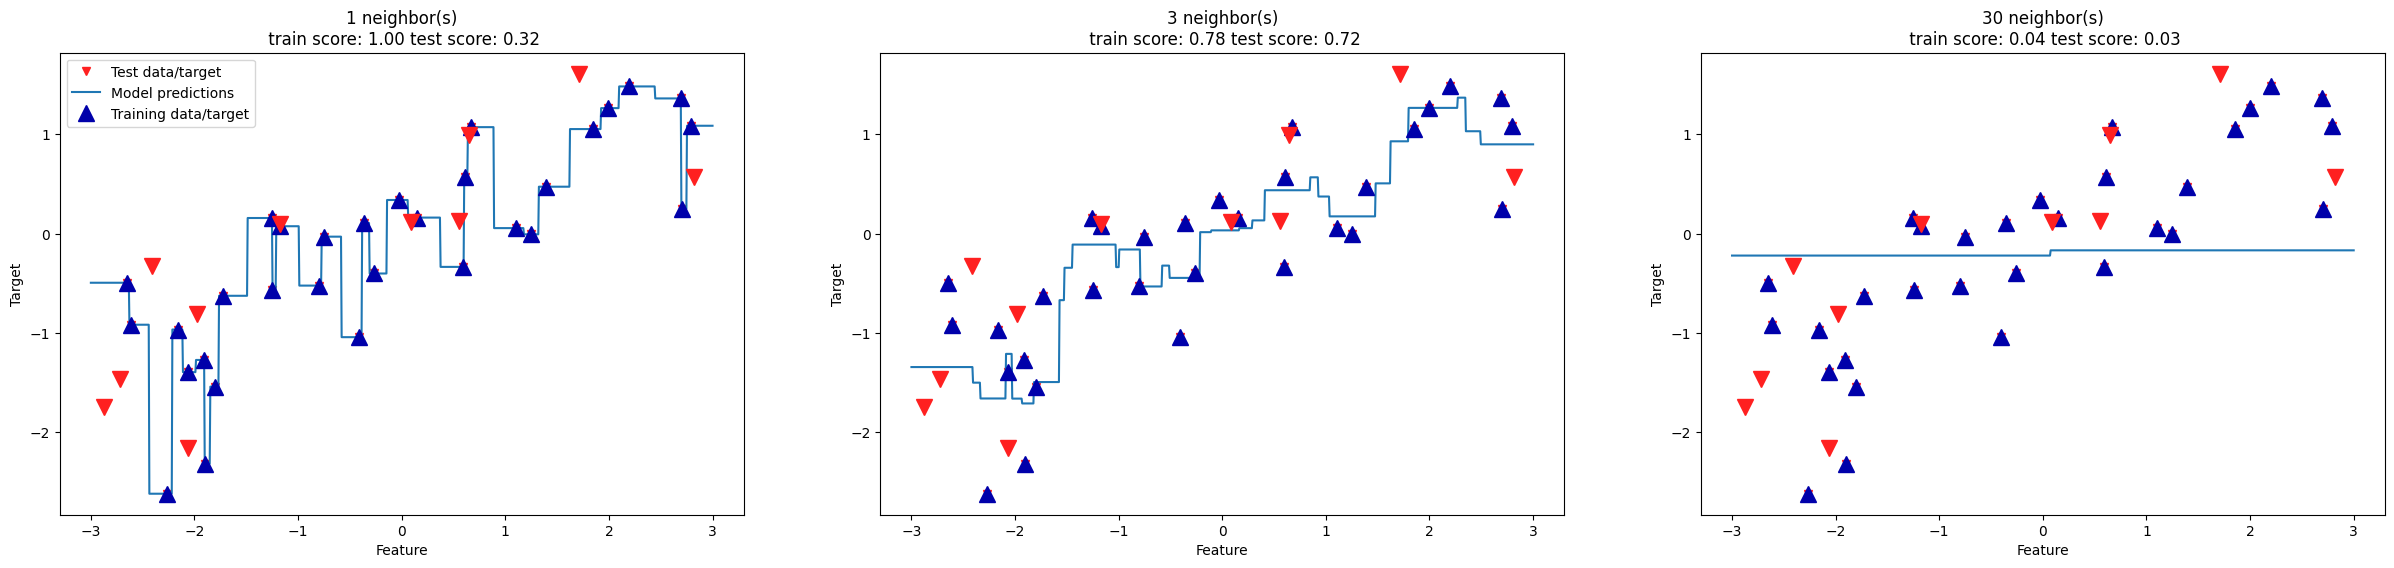

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 30], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='best')
pass

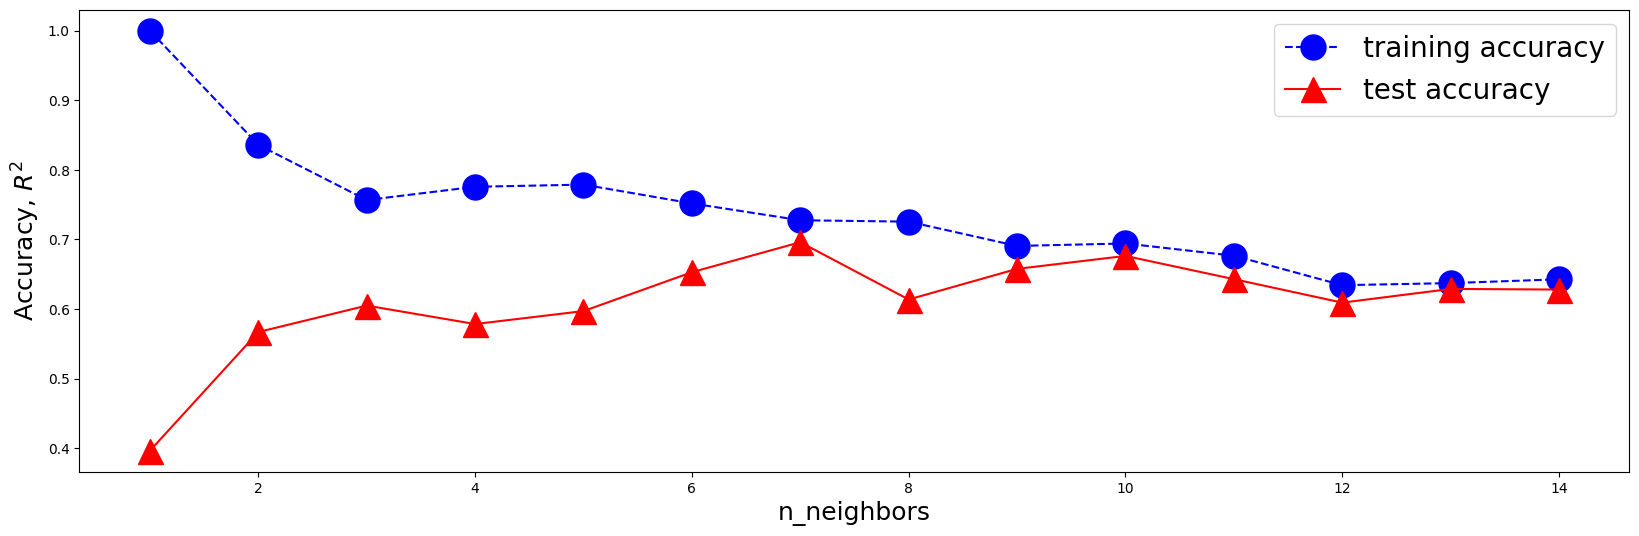

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))
fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy",
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()
pass

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,100,1):
    X, y = mglearn.datasets.make_wave(n_samples=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 29)

    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        training_accuracy.append(reg.score(X_train, y_train))
        test_accuracy.append(reg.score(X_test, y_test))

    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

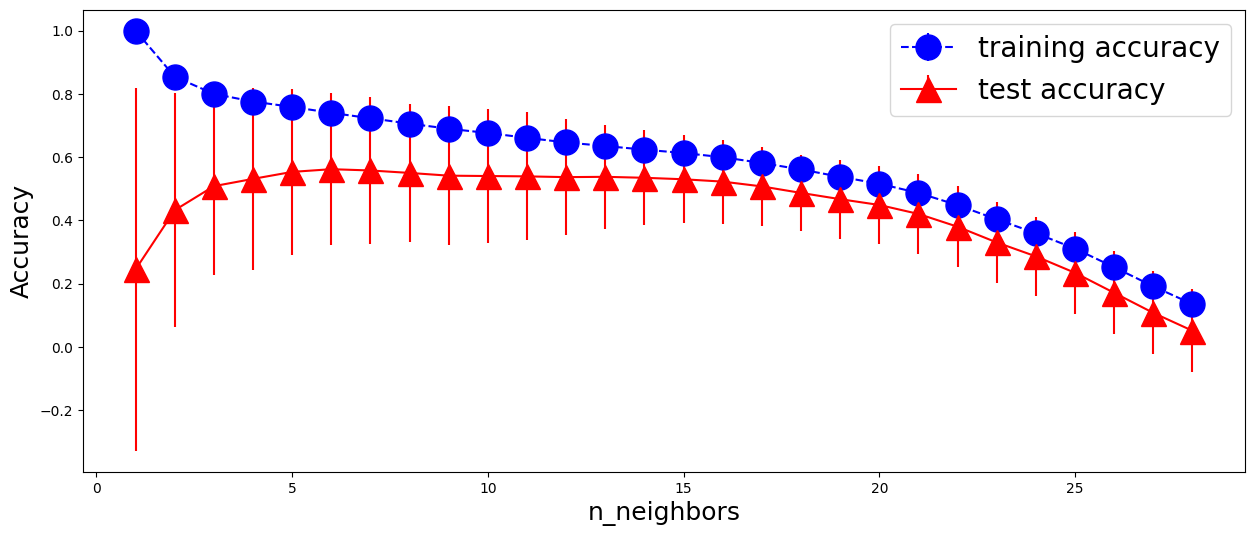

In [ ]:
fig = plt.figure(figsize=(15, 6))

import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

### **Logistic Regression L1 Regularization**

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
top_predictor_counts = {feature: 0 for feature in df_encoded.columns}
C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

for seedN in range(1, 15):
  X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, stratify=y, test_size=0.25, random_state=seedN)

  training_accuracy = []
  test_accuracy = []

  for C in C_values:
      lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
      lr_l1.fit(X_train, y_train)
      training_accuracy.append(lr_l1.score(X_train, y_train))
      test_accuracy.append(lr_l1.score(X_test, y_test))
      coef = lr_l1.coef_[0]
      top_predictor_index = np.argmax(np.abs(coef))
      top_predictor_variable = df_encoded.columns[top_predictor_index]
      top_predictor_counts[top_predictor_variable] += 1

  lahat_training[seedN] = training_accuracy
  lahat_test[seedN] = test_accuracy
  mean_train_accuracy = lahat_training.mean(axis=1)
  mean_test_accuracy = lahat_test.mean(axis=1)
  var_train_accuracy = lahat_training.var(axis=1)
  var_test_accuracy = lahat_test.var(axis=1)

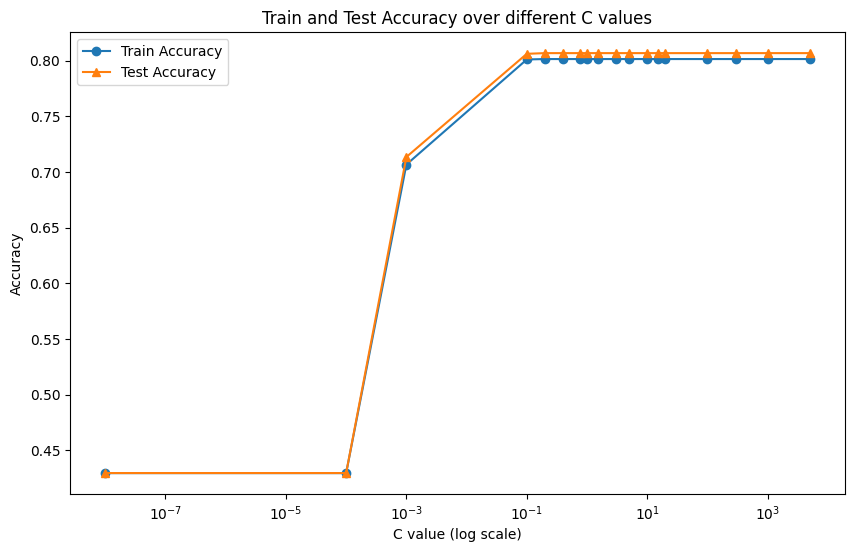

Highest Test Set Accuracy Achieved: 0.8066502463054187
Best C Parameter: 0.2
Most Frequent Top Predictor Variable: Myco_EMF


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_train_accuracy, label='Train Accuracy', marker='o')
plt.plot(C_values, mean_test_accuracy, label='Test Accuracy', marker='^')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over different C values')
plt.legend()
plt.show()
best_test_accuracy = np.amax(mean_test_accuracy)
best_C = C_values[np.argmax(mean_test_accuracy)]
most_frequent_top_predictor = max(top_predictor_counts, key=top_predictor_counts.get)

print(f"Highest Test Set Accuracy Achieved: {best_test_accuracy}")
print(f"Best C Parameter: {best_C}")
print(f"Most Frequent Top Predictor Variable: {most_frequent_top_predictor}")

### **Logistic Regression L2 Regularization**

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
top_predictor_counts = {feature: 0 for feature in df_encoded.columns}

C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

for seedN in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []

    for C in C_values:
        lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=C, max_iter=1000)
        lr_l2.fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))

        coef = lr_l2.coef_[0]
        top_predictor_index = np.argmax(np.abs(coef))
        top_predictor_variable = df_encoded.columns[top_predictor_index]
        top_predictor_counts[top_predictor_variable] += 1

    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

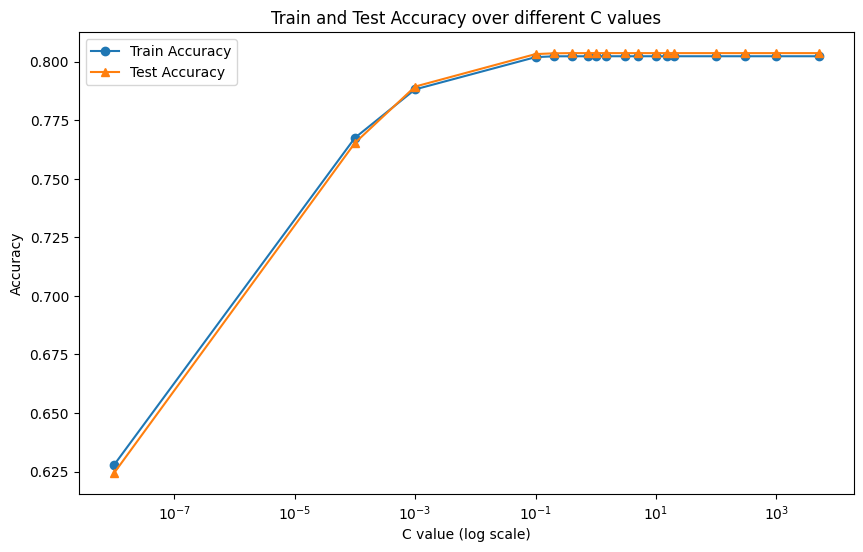

Highest Test Set Accuracy Achieved: 0.8036593947923998
Best C Parameter: 0.4
Most Frequent Top Predictor Variable: Myco_EMF


In [ ]:
mean_train_accuracy = lahat_training.mean(axis=1)
mean_test_accuracy = lahat_test.mean(axis=1)
var_train_accuracy = lahat_training.var(axis=1)
var_test_accuracy = lahat_test.var(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_train_accuracy, label='Train Accuracy', marker='o')
plt.plot(C_values, mean_test_accuracy, label='Test Accuracy', marker='^')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over different C values')
plt.legend()
plt.show()
best_test_accuracy = np.amax(mean_test_accuracy)
best_C = C_values[np.argmax(mean_test_accuracy)]
most_frequent_top_predictor = max(top_predictor_counts, key=top_predictor_counts.get)

print(f"Highest Test Set Accuracy Achieved: {best_test_accuracy}")
print(f"Best C Parameter: {best_C}")
print(f"Most Frequent Top Predictor Variable: {most_frequent_top_predictor}")

### **Linear SVM L1 Regularization**

In [ ]:
from sklearn.svm import LinearSVC
C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
def graphAcc(trainAcc, testAcc, C):
  plt.figure(figsize=(12,8))
  C_values = [str(i) for i in C]
  plt.plot(C_values, trainAcc)
  plt.plot(C_values, testAcc)
  plt.legend()
  plt.show()

In [ ]:
trainAcc1 = []
testAcc1 = []
for i in C:
  l1_svm = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, C=i, fit_intercept=True).fit(X_train, y_train)
  trainAcc1.append(l1_svm.score(X_train, y_train))
  testAcc1.append(l1_svm.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
l1_svm = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, C=5).fit(X_train, y_train)
print(l1_svm.score(X_train, y_train))
print(l1_svm.score(X_test, y_test))

0.8082454458293384
0.7859195402298851


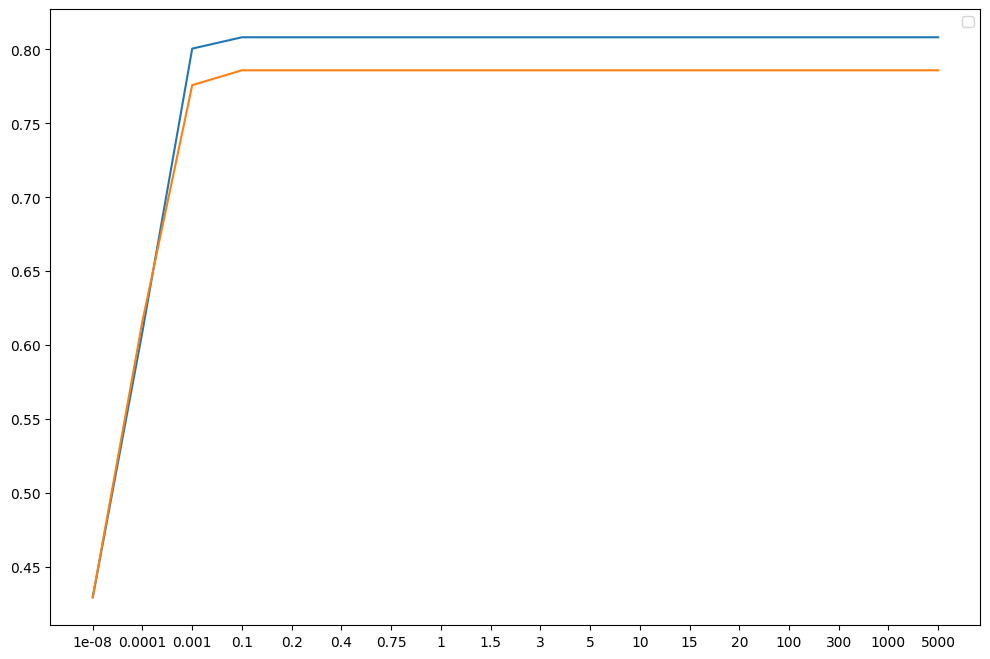

In [ ]:
#L1 Regularization SVM
graphAcc(trainAcc1, testAcc1, C)

The **optimal value** of C is ranging from 0.1 and above for L1 Regularizatoin in SVM

### **Linear SVM L2 Regularization**

In [ ]:
trainAcc2 = []
testAcc2 = []
for i in C:
  l2_svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=i, fit_intercept=True, max_iter=5000).fit(X_train, y_train)
  trainAcc2.append(l2_svm.score(X_train, y_train))
  testAcc2.append(l2_svm.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
l2_svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.75, fit_intercept=True).fit(X_train, y_train)
print(l2_svm.score(X_train, y_train))
print(l2_svm.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7267497603068073
0.7068965517241379


In [ ]:
#Testing Optimization Problem: Lagrangian
#Consistency Problem
trainScoresSVM = []
testScoresSVM = []
for i in range(0, 5):
  l2_svms = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.75, fit_intercept=True).fit(X_train, y_train)
  trainScoresSVM.append(l2_svms.score(X_train, y_train))
  testScoresSVM.append(l2_svms.score(X_test, y_test))
print('Train Scores: ')
print(trainScoresSVM)
print('Test Scores: ')
print(testScoresSVM)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Scores: 
[0.7636625119846596, 0.6356663470757431, 0.7037392138063279, 0.6922339405560882, 0.6615532118887824]
Test Scores: 
[0.7701149425287356, 0.632183908045977, 0.6781609195402298, 0.6594827586206896, 0.6810344827586207]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


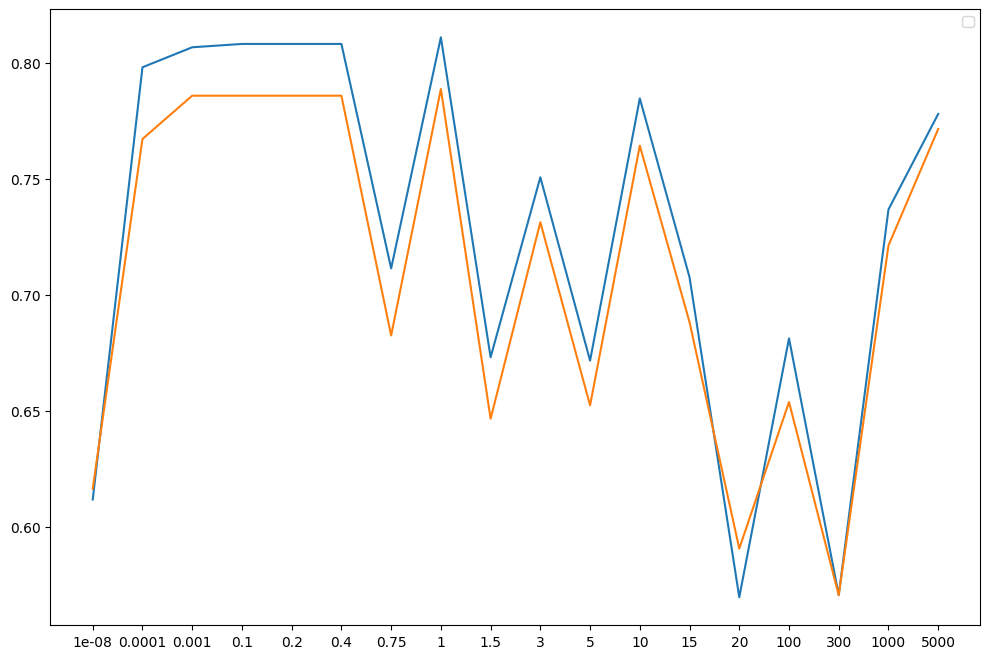

In [ ]:
#L2 Regularization SVM
graphAcc(trainAcc2, testAcc2, C)

In [ ]:
l2_svm_coefficients = l2_svm.coef_[0]
l1_svm_coefficients = l1_svm.coef_[0]
feature_names = [i for i in X_train]

def graphCoefficients(coefficients, title):
  plt.barh(feature_names, coefficients)
  plt.title('Top predictor Graph of ' + title)
  plt.xlabel('coefficients')
  plt.ylabel('feature')
  plt.show()

#### **Top Predictor of SVM**

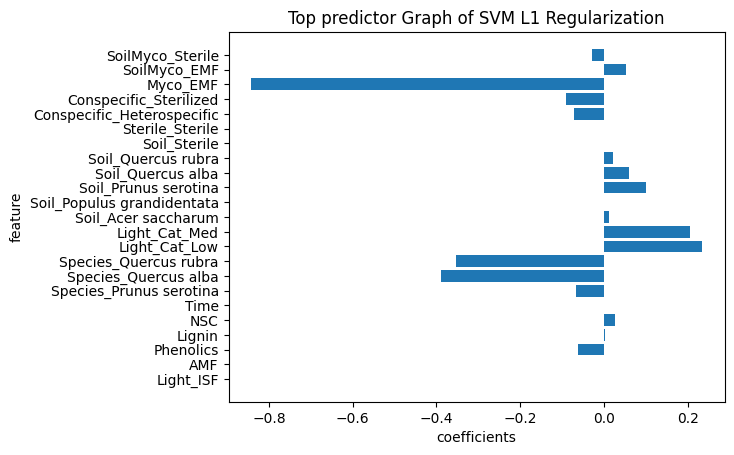

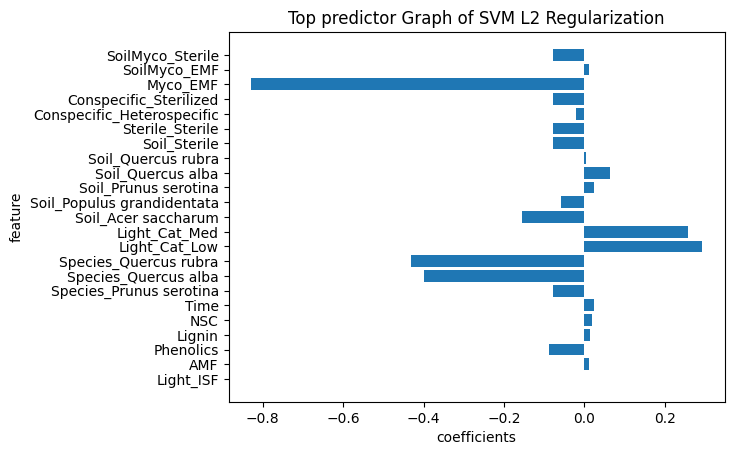

In [ ]:
graphCoefficients(l1_svm_coefficients, 'SVM L1 Regularization')
graphCoefficients(l2_svm_coefficients, 'SVM L2 Regularization')

Top Predictor is Myco_EMF followed by Species_Quercus rubra and Species_Quercus alba

#### Optimal Value
The **optimal value** of C depends for L2 Regularization in SVM
The optimization problem where we use Lagrangian proved the consistency issue of the model, if we set the max iteration, it helped deal with the consistency problem



#### Highest Accuracy
The highest accuracy the both regularization of SVM achieved was 80%
- Even if we set the parameter dual to True, the highest possible accuracy is still 80%

### **Decision Trees**

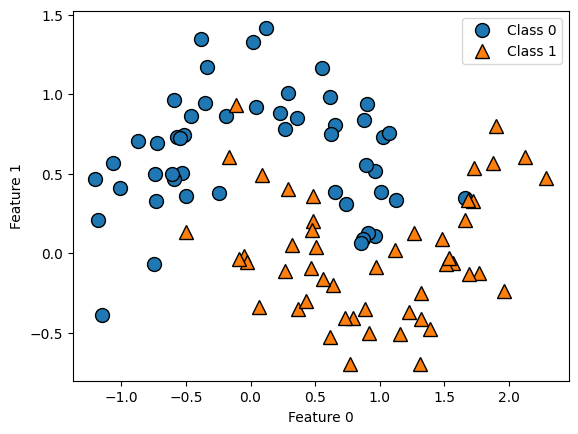

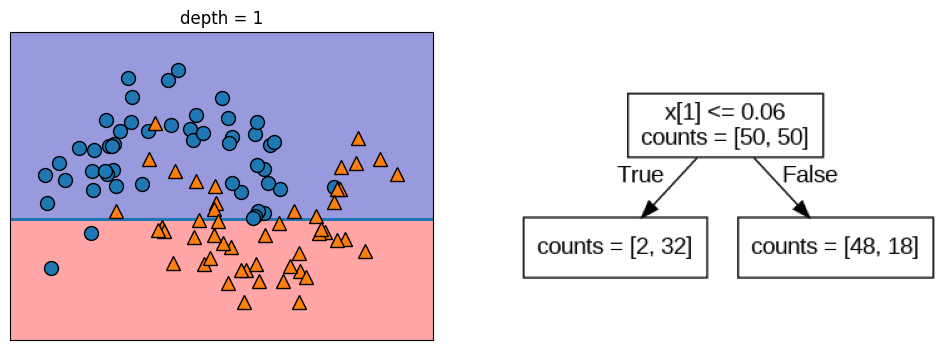

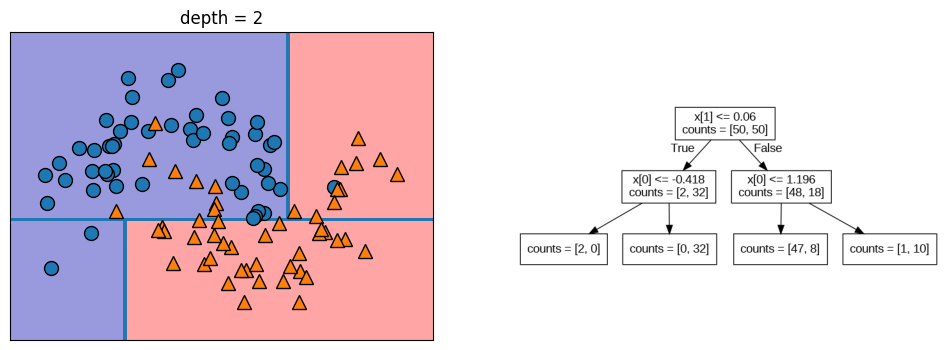

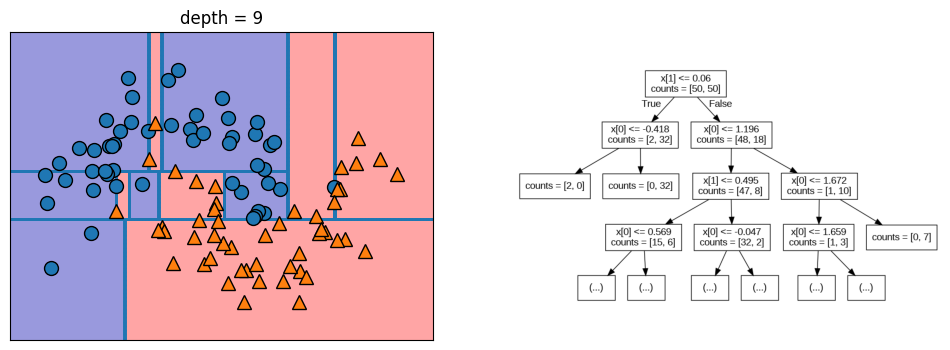

In [ ]:
mglearn.plots.plot_tree_progressive()

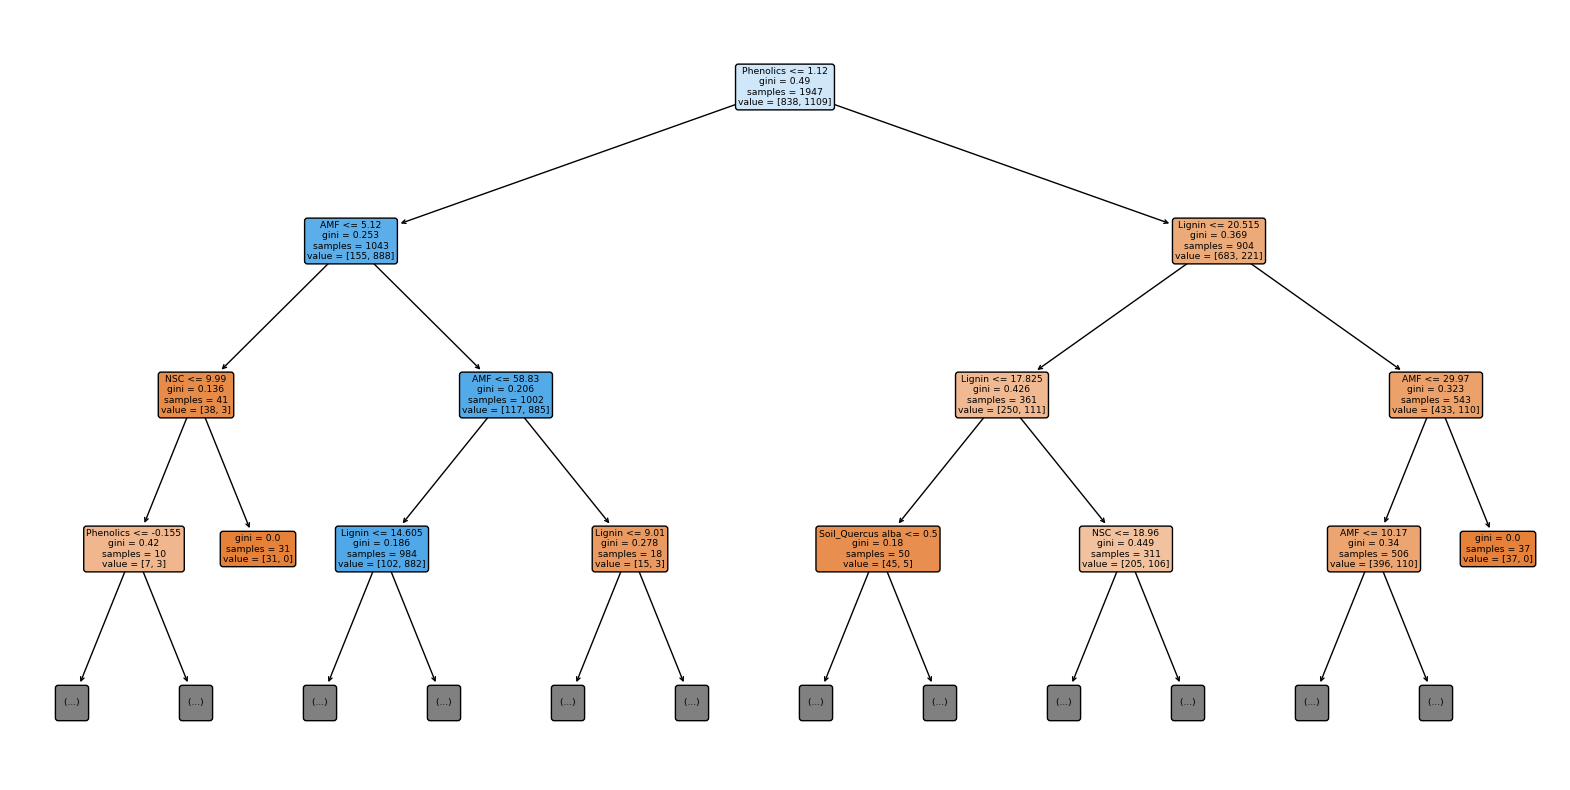

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=features, rounded=True, max_depth=3)
plt.show()

In [ ]:
def decision_tree_analysis(X_train, X_test, y_train, y_test, maxdepth_settings=range(1, 50), num_seeds=100):

    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()

    for seedN in range(1, num_seeds + 1):
        training_accuracy = []
        test_accuracy = []

        for depth in maxdepth_settings:
            tree = DecisionTreeClassifier(max_depth=depth, random_state=seedN)
            tree.fit(X_train, y_train)
            training_accuracy.append(tree.score(X_train, y_train))
            test_accuracy.append(tree.score(X_test, y_test))

        lahat_training[seedN] = training_accuracy
        lahat_test[seedN] = test_accuracy

    fig = plt.figure(figsize=(15, 6))
    plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1), yerr=lahat_training.std(axis=1), label="Training accuracy", linestyle='--', marker='o')
    plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1), yerr=lahat_test.std(axis=1), label="Test accuracy", linestyle='-', marker='o')
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.title("Model Accuracy by max_depth")
    plt.legend()

    best_depth = lahat_test.mean(axis=1).idxmax() + 1
    highest_test_accuracy = lahat_test.mean(axis=1).max()

    print(f"Highest Average Test Set Accuracy Achieved = {highest_test_accuracy:.4f}")
    print(f"Best max_depth Parameters = {best_depth}")

    return best_depth, highest_test_accuracy, fig

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.96172249 0.94724221 0.95443645 0.95683453 0.94964029]
Average cross-validation score: 0.9539751930513006


The Decision Tree model developed effectively identified key environmental and seedling factors influencing tree seedling survival, with features like light levels, soil type, and mycorrhizal associations playing significant roles. The model achieved an accuracy of approximately 82% in predicting seedling survival, showing that AI can be a powerful tool for optimizing tree planting strategies in diverse environments. This can greatly enhance global reforestation efforts by ensuring the right trees are planted in the best conditions, thereby improving survival rates and contributing to climate change mitigation and biodiversity preservation.

### **Random Forest**

In [ ]:
def random_forest_classifier_analysis(X, y):

    results = {}
    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()

    for seedN in range(1, 50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
        training_accuracy = []
        test_accuracy = []
        max_depth_settings = range(1, 10)

        for depth in max_depth_settings:
            forest = RandomForestClassifier(max_depth=depth, random_state=0, n_estimators=100)
            forest.fit(X_train, y_train)
            training_accuracy.append(forest.score(X_train, y_train))
            test_accuracy.append(forest.score(X_test, y_test))


        lahat_training[seedN] = training_accuracy
        lahat_test[seedN] = test_accuracy


    best_max_depth = np.argmax(lahat_test.mean(axis=1)) + 1
    best_test_accuracy = np.amax(lahat_test.mean(axis=1))

    results['best_max_depth'] = best_max_depth
    results['best_test_accuracy'] = best_test_accuracy
    results['training_accuracies'] = lahat_training
    results['test_accuracies'] = lahat_test

    fig = plt.figure(figsize=(15, 6))
    plt.errorbar(max_depth_settings, lahat_training.mean(axis=1),
                 yerr=lahat_training.std(axis=1), label="Training accuracy")
    plt.errorbar(max_depth_settings, lahat_test.mean(axis=1),
                 yerr=lahat_test.std(axis=1), label="Test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.title("Model Accuracy by max_depth")
    plt.legend()

    return results, fig

In [ ]:
def plot_feature_importance(X, y, best_max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    best_forest = RandomForestClassifier(max_depth=best_max_depth, random_state=0, n_estimators=100)
    best_forest.fit(X_train, y_train)

    importances = best_forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.ylabel('Importance')
    plt.show()

### **Gradient Boosting Method**

In [ ]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [ ]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])


In [ ]:
encoder = ce.OneHotEncoder(cols=categorical_cols, use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [ ]:
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)


In [ ]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)


In [ ]:
X_train_final = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded_df], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gradientBoostingModel = GradientBoostingClassifier(random_state=0).fit(X_train_final, y_train)
print("Training Accuracy: ", gradientBoostingModel.score(X_train_final, y_train))
print("Testing Accuracy: ", gradientBoostingModel.score(X_test_final, y_test))

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

    plot_feature_importances(gradientBoostingModel, X.columns)

Training Accuracy:  0.9775280898876404
Testing Accuracy:  0.9712746858168761


In [ ]:
def graphHyperparameterTuning(parameterRange, scores, title, xlabel):
    plt.plot(parameterRange, scores[0], label='Train')
    plt.plot(parameterRange, scores[1], label='Test')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


#####Max depth parameter from 1 to 11




In [ ]:
trainScores = []
testScores = []
print('Performance of model by tuning max depth')
for i in range(1, 11):
    pipeline.set_params(classifier__max_depth=i)
    pipeline.fit(X_train, y_train)
    trainAcc = pipeline.score(X_train, y_train)
    testAcc = pipeline.score(X_test, y_test)
    trainScores.append(trainAcc)
    testScores.append(testAcc)
    print(f'Model: max depth={i}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning max depth
Model: max depth=1
Train Accuracy: 0.9595505617977528
Test Accuracy: 0.9587073608617595

Model: max depth=2
Train Accuracy: 0.983370786516854
Test Accuracy: 0.9748653500897666

Model: max depth=3
Train Accuracy: 0.9982022471910112
Test Accuracy: 0.9748653500897666

Model: max depth=4
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9784560143626571

Model: max depth=5
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9820466786355476

Model: max depth=6
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9784560143626571

Model: max depth=7
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9766606822262118

Model: max depth=8
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9748653500897666

Model: max depth=9
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9748653500897666

Model: max depth=10
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9766606822262118



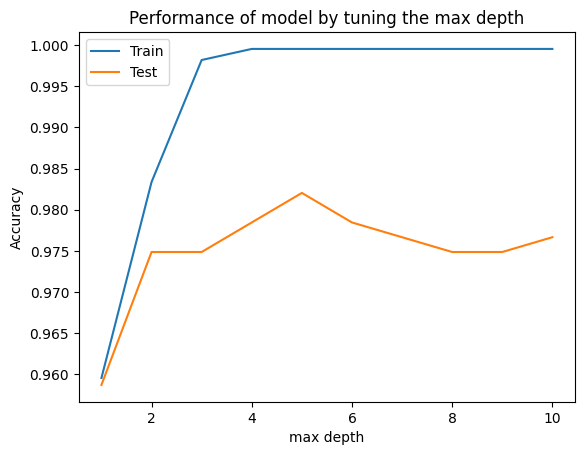

In [ ]:
graphHyperparameterTuning(range(1, 11), [trainScores, testScores], 'Performance of model by tuning the max depth', 'max depth')

In [ ]:

problematic_column = X_train.columns[X_train.isin(['Quercus alba']).any()]


encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(X_train[problematic_column])

In [ ]:

X_train_encoded = pd.concat([X_train.drop(problematic_column, axis=1),
                             pd.DataFrame(encoded_data.toarray(),
                                          columns=encoder.get_feature_names_out(problematic_column))], axis=1)

#####Learning rate parameter [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

In [ ]:
trainScores2 = []
testScores2 = []
learningRate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
print('Performance of model by tuning Learning rate')
for lr in learningRate:
    pipeline.set_params(classifier__learning_rate=lr)
    pipeline.fit(X_train, y_train)
    trainAcc = pipeline.score(X_train, y_train)
    testAcc = pipeline.score(X_test, y_test)
    trainScores2.append(trainAcc)
    testScores2.append(testAcc)
    print(f'Model: learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate
Model: learning rate=0.0001
Train Accuracy: 0.5680898876404494
Test Accuracy: 0.5798922800718133

Model: learning rate=0.001
Train Accuracy: 0.5680898876404494
Test Accuracy: 0.5798922800718133

Model: learning rate=0.01
Train Accuracy: 0.9532584269662921
Test Accuracy: 0.9640933572710951

Model: learning rate=0.1
Train Accuracy: 0.9775280898876404
Test Accuracy: 0.9712746858168761

Model: learning rate=0.2
Train Accuracy: 0.9919101123595505
Test Accuracy: 0.9748653500897666

Model: learning rate=0.3
Train Accuracy: 0.9982022471910112
Test Accuracy: 0.9748653500897666



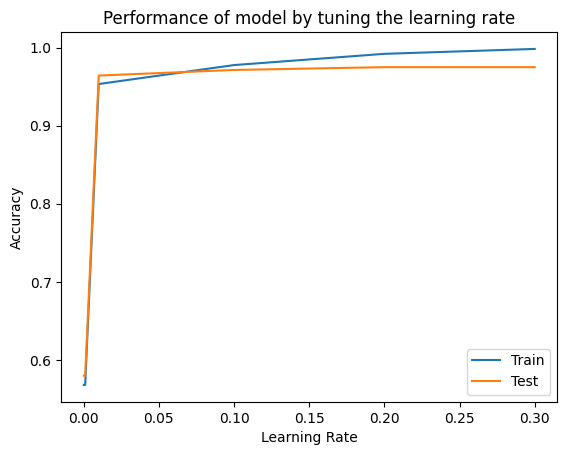

In [ ]:
graphHyperparameterTuning(learningRate, [trainScores2, testScores2], 'Performance of model by tuning the learning rate', 'Learning Rate')

#####we trying to increase the max depht and learning rate

In [ ]:
# Hyperparameter tuning: learning_rate and max_depth
trainScores4 = []
testScores4 = []
print('Performance of model by tuning Learning rate and max depth')
for lr in learningRate:
    pipeline.set_params(classifier__learning_rate=lr, classifier__max_depth=learningRate.index(lr) + 1)
    pipeline.fit(X_train, y_train)
    trainAcc = pipeline.score(X_train, y_train)
    testAcc = pipeline.score(X_test, y_test)
    trainScores4.append(trainAcc)
    testScores4.append(testAcc)
    print(f'Model: max depth={learningRate.index(lr) + 1}, learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate and max depth
Model: max depth=1, learning rate=0.0001
Train Accuracy: 0.5680898876404494
Test Accuracy: 0.5798922800718133

Model: max depth=2, learning rate=0.001
Train Accuracy: 0.5680898876404494
Test Accuracy: 0.5798922800718133

Model: max depth=3, learning rate=0.01
Train Accuracy: 0.9532584269662921
Test Accuracy: 0.9640933572710951

Model: max depth=4, learning rate=0.1
Train Accuracy: 0.988314606741573
Test Accuracy: 0.9784560143626571

Model: max depth=5, learning rate=0.2
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9766606822262118

Model: max depth=6, learning rate=0.3
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9784560143626571



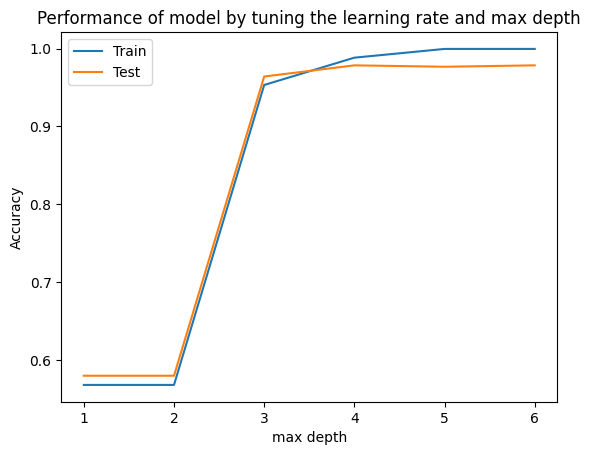

In [ ]:
graphHyperparameterTuning([learningRate.index(lr) + 1 for lr in learningRate], [trainScores4, testScores4], 'Performance of model by tuning the learning rate and max depth', 'max depth')

#####We test lowering the learning rate and maximizing the depth

In [ ]:
trainScores5 = []
testScores5 = []
print('Performance of model by tuning Learning rate and max depth with a negative relationship')
for lr in learningRate:
    pipeline.set_params(classifier__learning_rate=-lr + 1, classifier__max_depth=learningRate.index(lr) + 1)
    pipeline.fit(X_train, y_train)
    trainAcc = pipeline.score(X_train, y_train)
    testAcc = pipeline.score(X_test, y_test)
    trainScores5.append(trainAcc)
    testScores5.append(testAcc)
    print(f'Model: max depth={learningRate.index(lr) + 1}, learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate and max depth with a negative relationship
Model: max depth=1, learning rate=0.0001
Train Accuracy: 0.971685393258427
Test Accuracy: 0.9640933572710951

Model: max depth=2, learning rate=0.001
Train Accuracy: 0.9982022471910112
Test Accuracy: 0.9676840215439856

Model: max depth=3, learning rate=0.01
Train Accuracy: 0.9734831460674157
Test Accuracy: 0.9389587073608617

Model: max depth=4, learning rate=0.1
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9766606822262118

Model: max depth=5, learning rate=0.2
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9712746858168761

Model: max depth=6, learning rate=0.3
Train Accuracy: 0.9995505617977528
Test Accuracy: 0.9784560143626571



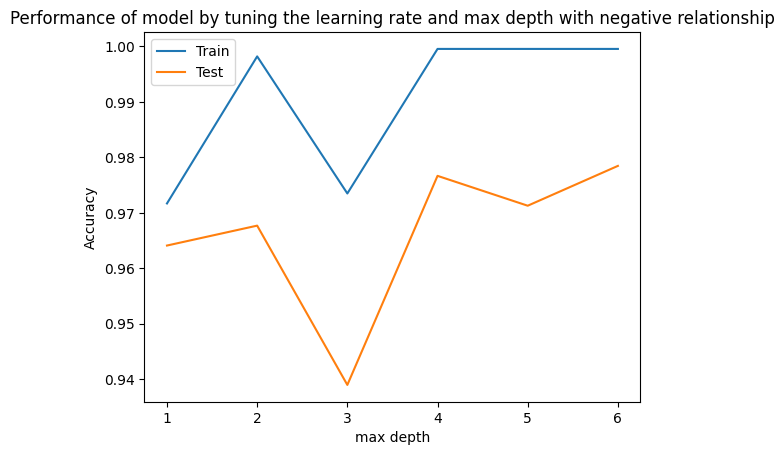

In [ ]:
graphHyperparameterTuning([learningRate.index(lr) + 1 for lr in learningRate], [trainScores5, testScores5], 'Performance of model by tuning the learning rate and max depth with negative relationship', 'max depth')

In [ ]:
def gradient_boosting_classifier_analysis(X, y):
    results = {}
    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()

    maxdepth_settings = range(1, 10)

    for seedN in range(1, 50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
        training_accuracy = []
        test_accuracy = []

        for depth in maxdepth_settings:
            gbc = GradientBoostingClassifier(max_depth=depth, random_state=0, n_estimators=100)
            gbc.fit(X_train, y_train)
            training_accuracy.append(gbc.score(X_train, y_train))
            test_accuracy.append(gbc.score(X_test, y_test))

        lahat_training[seedN] = training_accuracy
        lahat_test[seedN] = test_accuracy

    best_max_depth = np.argmax(lahat_test.mean(axis=1)) + 1
    best_test_accuracy = np.amax(lahat_test.mean(axis=1))

    results['best_max_depth'] = best_max_depth
    results['best_test_accuracy'] = best_test_accuracy
    results['training_accuracies'] = lahat_training
    results['test_accuracies'] = lahat_test

    return results

def plot_feature_importance(X, y, best_max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    best_gbc = GradientBoostingClassifier(max_depth=best_max_depth, random_state=0, n_estimators=100)
    best_gbc.fit(X_train, y_train)

    importances = best_gbc.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.ylabel('Importance')
    plt.show()

## **5 Results and Discussion**

### **Model Results**


| Machine Learning Method | Test Accuracy | Best Parameter | Top Predictor Variable |
| -: | :-: | :-: | -: |
| **kNN** | 0.72 | n=3 | NA
| **Logistic Regression with L1-Regularization** | 0.80665 | 0.2 | Myco_EMF |
| **Logistic Regression with L2-Regularization**	| 0.80365  | 0.4  | Myco_EMF |
| **Linear SVM with L1-Regularization** | 0.803 | 0.1 | Myco_EMF |
| **Linear SVM with L2-Regularization** | 0.801 | 0.75 | Myco_EMF |



### **Machine Learning Algorithm (cont. Decision Tree)**


Highest Average Test Set Accuracy Achieved = 0.9655
Best max_depth Parameters = 5


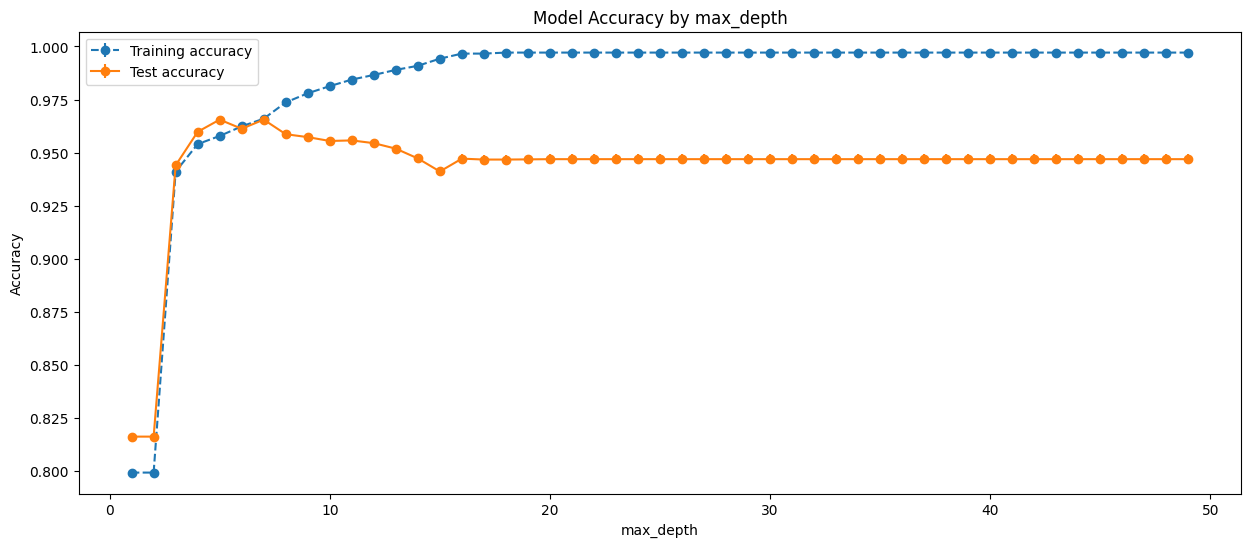

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=1)
best_depth, highest_test_accuracy, fig = decision_tree_analysis(X_train, X_test, y_train, y_test)
fig.show()

### **Machine Learning Algorithm (cont. Random Forest)**


Highest Average Test Set Accuracy Achieved = 0.9511
Best max_depth = 9


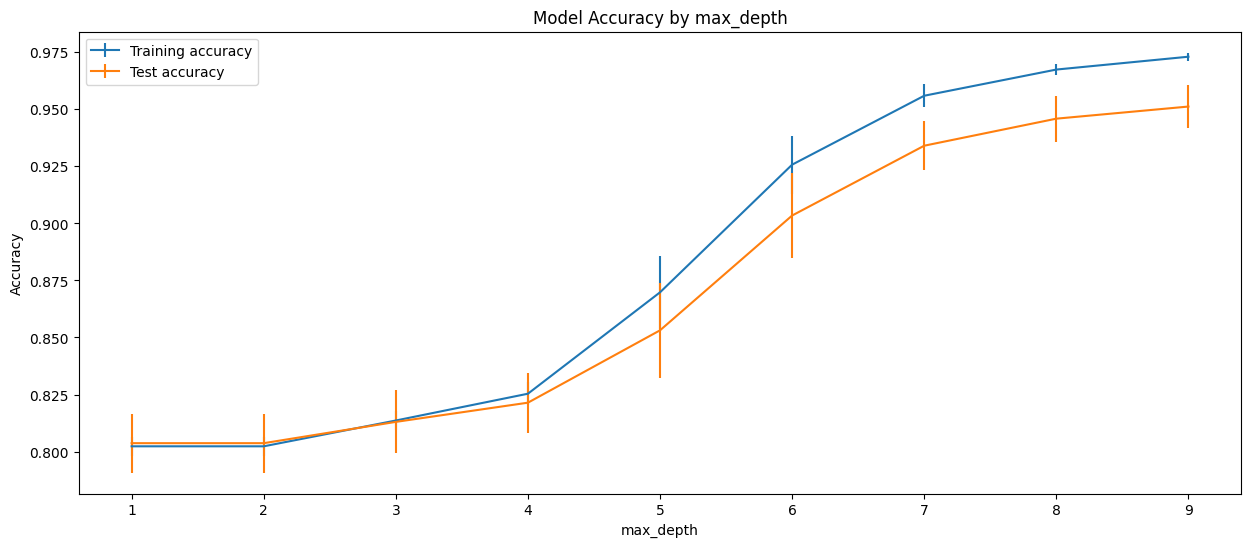

In [ ]:
results, fig = random_forest_classifier_analysis(df_encoded, y)

print(f"Highest Average Test Set Accuracy Achieved = {results['best_test_accuracy']:.4f}")
print(f"Best max_depth = {results['best_max_depth']}")

plt.show()

### **Machine Learning Algortihm (cont. Gradient Boosting Method)**

**{'learning_rate': 0.3, 'max_depth': 6}**

accuracy on training set: **0.9996**

accuracy on test set: **0.9785**

### **5.1 Feature Importance of Top Models**

#### **Feature Importance of Gradient Boosting**

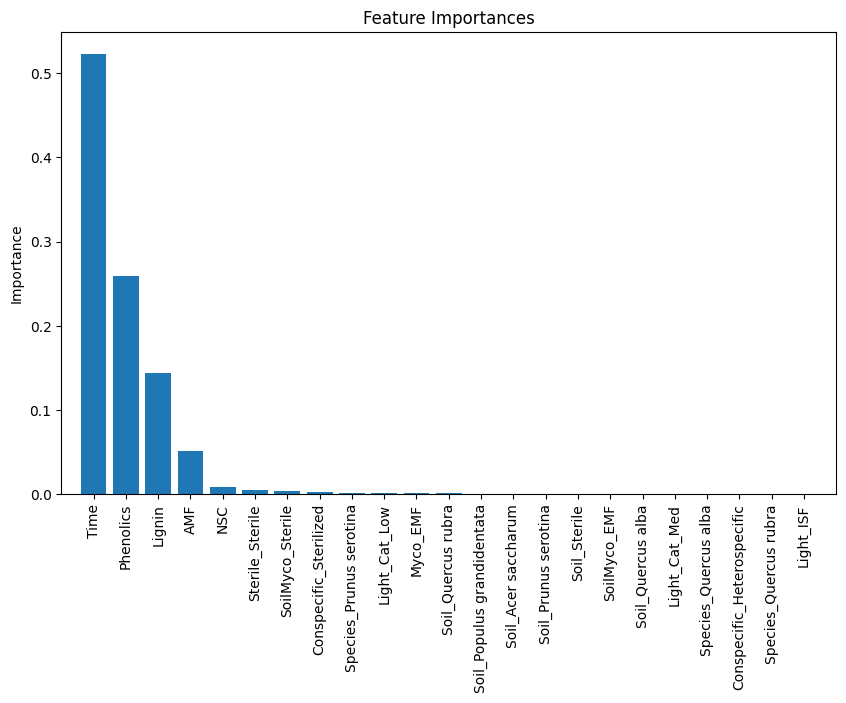

In [ ]:
results = gradient_boosting_classifier_analysis(df_encoded, y)
best_max_depth = results['best_max_depth']

plot_feature_importance(df_encoded, y, best_max_depth)

#### **Feature Importance of Decision Tree**

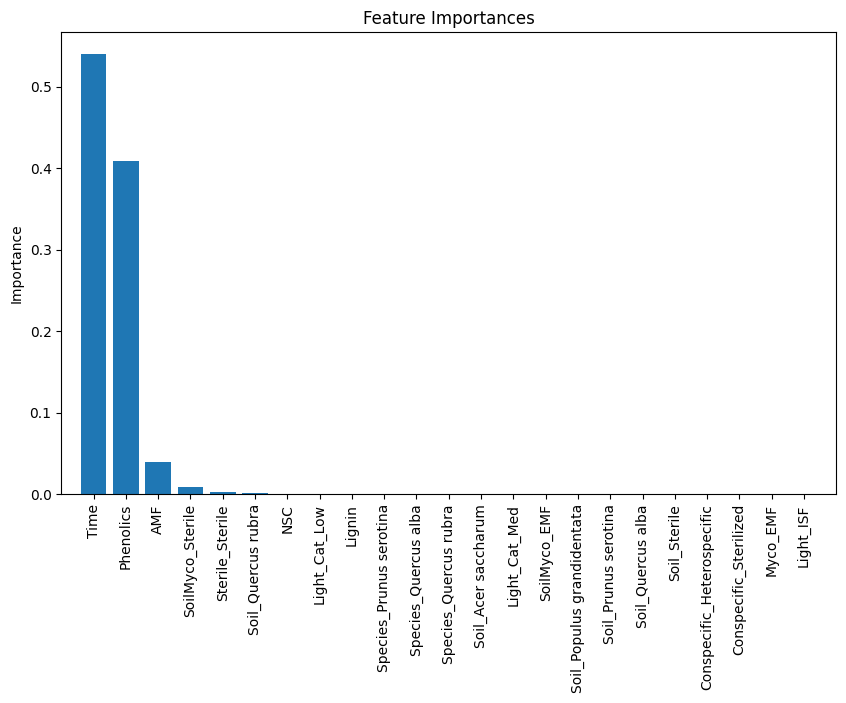

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
best_tree.fit(X_train, y_train)

importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.show()

#### **Feature Importance of Random Forest**

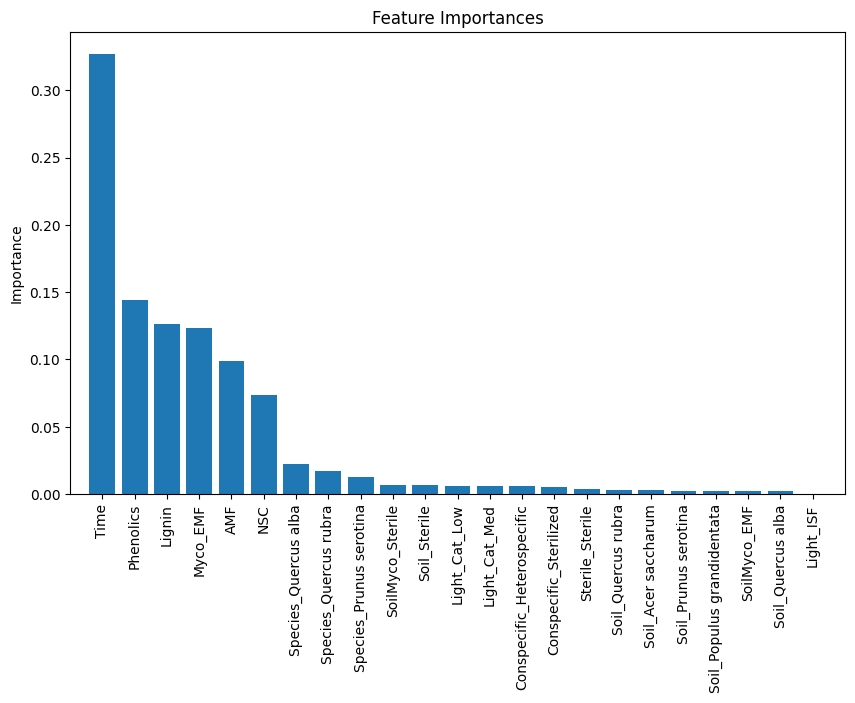

In [ ]:
plot_feature_importance(df_encoded, y, best_max_depth)

### **SHAP (SHapley Additive exPlanations)**

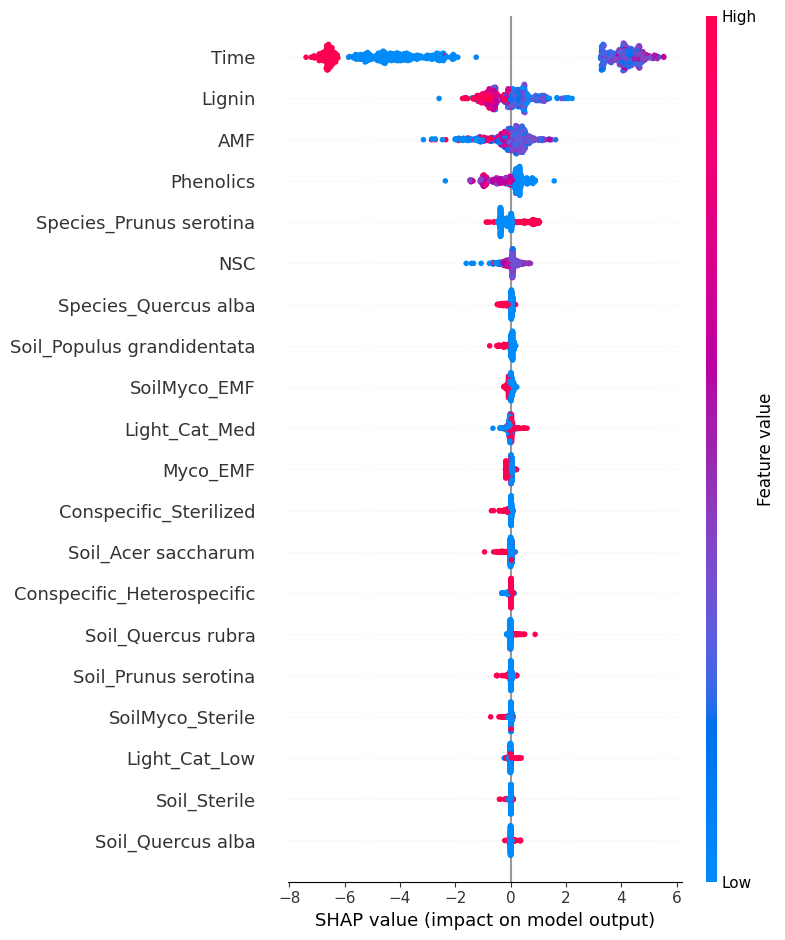

In [ ]:
best_max_depth = 6
best_gbc = GradientBoostingClassifier(max_depth=best_max_depth, random_state=0, n_estimators=100)
best_gbc.fit(X_train, y_train)

explainer = shap.Explainer(best_gbc, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

**Interpreting the SHAP graph of the Gradient Boosting Classifier**

| Feature | Seeds that Die (Event = 1)| Seeds that Stay Alive (Event = 0) |
| :- | :-: | :-: |
| **Time** | Seeds that have been around for a longer time (red dots) are more likely to die. <br>  | Seeds that have been around for a shorter time are more likely to be alive. <br>Low time values (blue dots) decrease the chance of death. |
| **Lignin** | Seeds with lower lignin content(blue dots) are more likely to die. <br> | Seeds with higher lignin content(red dots) are more likely to be alive. |
| **AMF** |  Seeds with lower levels of arbuscular mycorrhizal fungi (AMF) (blue dots) are more likely to die.  |   Seeds with higher levels of arbuscular mycorrhizal fungi(AMF) --Red Dots are more likely to be alive.|
| **Phenolics** | Seeds with lower phenolics(blue dots) are more likely to die. |  Seeds with higher phenolics are more likely to be alive (red dots).
| **Species** | Some species are more likely to die than others. |  Some species are more likely to survive than others.
| **Other factors** | Things like soil type, light conditions, and non-structural carbohydrates (NSC) <br> also affect survival, but they are less important than the top factors. | Certain soil types, better light conditions, and other specific environmental <br> factors can increase the likelihood of seedling survival.

**Summary:**

Seeds that tend to die are often found in all soil types, under low and medium light conditions, and have lower levels of protective substances like lignin, AMF, and phenolics. Specific species such as Prunus serotina and Quercus alba are also more prone to death under these conditions.

On the other hand, seeds that stay alive are with higher levels of protective substances like lignin, AMF, and phenolics. These seeds are also typically younger, as longer time periods increase the likelihood of death.

### **5.2 Model Evaluation**

Confusion Matrix:
[[294  18]
 [  9 375]]


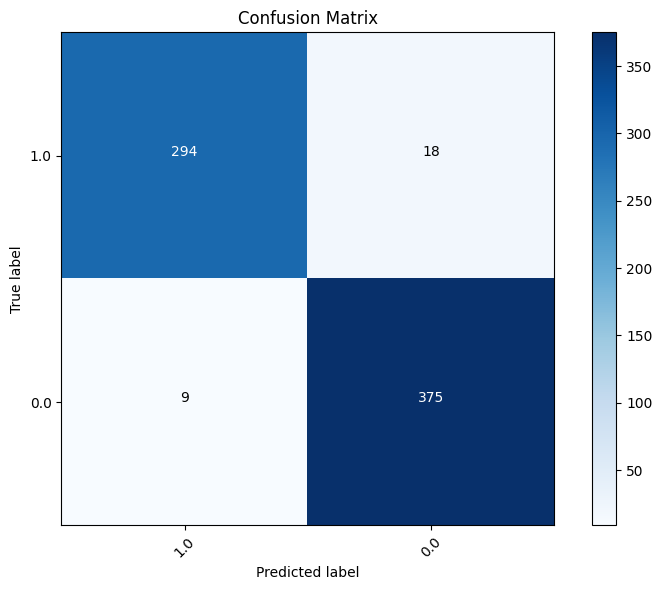


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       312
         1.0       0.95      0.98      0.97       384

    accuracy                           0.96       696
   macro avg       0.96      0.96      0.96       696
weighted avg       0.96      0.96      0.96       696



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=0)

best_gbc = GradientBoostingClassifier(learning_rate=0.3, max_depth=6, random_state=0)
best_gbc.fit(X_train, y_train)

y_pred = best_gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(df_encoded_target.unique()))
plt.xticks(tick_marks, df_encoded_target.unique(), rotation=45)
plt.yticks(tick_marks, df_encoded_target.unique())

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


The confusion matrix shows the performance of the model in terms of true positives, true negatives, false positives, and false negatives. Here, the model correctly predicted 294 seedlings that died (true positives) and 375 seedlings that survived (true negatives). There were 18 false positives (predicted to survive but actually died) and 9 false negatives (predicted to die but actually survived). This indicates the model is highly accurate, with very few mistakes in predicting seedling survival and death.

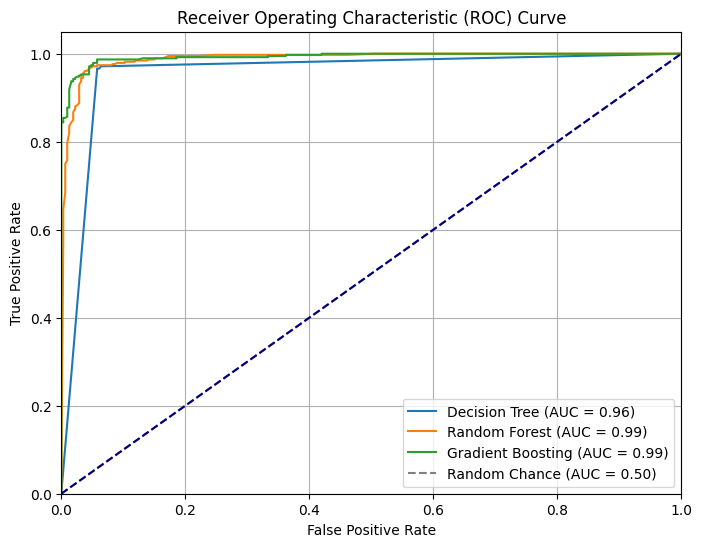

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=0)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

y_random = [0] * len(y_test)
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

fpr_random, tpr_random, _ = roc_curve(y_test, y_random)
roc_auc_random = auc(fpr_random, tpr_random)
plt.plot(fpr_random, tpr_random, linestyle='--', color='gray', label=f'Random Chance (AUC = {roc_auc_random:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC (Receiver Operating Characteristic) curve compares the true positive rate (sensitivity) against the false positive rate for three different models: Decision Tree, Random Forest, and Gradient Boosting. The closer the curve is to the top-left corner, the better the model. The AUC (Area Under the Curve) scores show that Random Forest and Gradient Boosting models have excellent performance (AUC = 0.99), while the Decision Tree is also very good (AUC = 0.96). This means all three models are highly effective at distinguishing between seedlings that will die and those that will survive, with Random Forest and Gradient Boosting being slightly better.

### **6 Conclusion**

**conclusion based sa 3 questions sa problem statement**

### **7 References**



*   seedling. (2024). In Merriam-Webster Dictionary. https://www.merriam-webster.com/dictionary/seedling#:~:text=1,before%20it%20becomes%20a%20sapling
*   Wikipedia contributors. (2024, May 23). Tree planting. Wikipedia. https://en.wikipedia.org/wiki/Tree_planting
*   Tree Planting Philippines – Eight Benefits of Tree Planting (n.d.-b). https://onetotree.org/news/benefits-of-tree-planting/
*   Wood, Katherine; Kobe, Richard; Ibáñez, Inés; McCarthy-Neumann, Sarah (2023). Tree seedling functional traits mediate plant-soil feedback survival responses across a gradient of light availability [Dataset]. Dryad. https://doi.org/10.5061/dryad.xd2547dpw




